# 1. Libraries

In [1]:
# Import Libraries, define classes  

import pandas as pd
import numpy as np
#import os 
import matplotlib.pyplot as plt # graphs 
from matplotlib import colors # add colour to life
import seaborn as sns  #visualisations
#import squarify #visualisations
import warnings #depreciation warning
import chardet # Check encoding
from scipy import stats    #tranformation
import re # for wrangling
import statsmodels.api as sm #stats
from statsmodels.graphics.gofplots import qqplot#qq plot
from scipy.stats import kruskal # non-parametric test 
from sklearn.model_selection import train_test_split # spliting train/test
# For Decision Tree Regressions
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Clustering 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import random # random sampling
from pylab import rcParams
from sklearn import preprocessing # For train-test split
from sklearn.model_selection import train_test_split
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report

class colours:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def header(sentence): 
     return (colours.HEADER+"\n '%s' : \n"%(sentence)+colours.ENDC )

    
# Fixing random state for reproducibility
np.random.seed(19680801)

# Depreciation warning off 
warnings.filterwarnings("ignore") 
pd.options.mode.chained_assignment = None

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1.1. Table of Contents 

## 1.2. Word Count

## 1.3. Merging Indiegogo CSVs 

# 2. Loading Data
## 2.1. Kickstarter Dataset 
- Obtained from Kaggle
- https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201612.csv 
### 2.1.1. Initial Observations
- 15 original columns/features.
- 378661 rows
- Certain numerical features are redundant
- Certain features have exceptionally high std(goal: 1183391).
- Most values present, however usd_pledged looks like an issue
- Feature "state" has more types of state than necessary; can become binary

In [2]:
#Check encoding of file. High confidence its UTF-8
def encoding_type (dataset_name, bytes_read):
    with open (dataset_name, "rb") as rawdata:
        encoding = chardet.detect(rawdata.read(bytes_read))
        print (colours.HEADER+"\nDataset Encoding:\n"+colours.ENDC, encoding)
        
encoding_type('kick_18.csv',30000)

#Dataset 
df_k = pd.read_csv("kick_18.csv")

#Basic Info
print(header("Column Names"),df_k.columns)
print(header("DataFrame Shape"),df_k.shape)
print(header("Data Types"),df_k.dtypes)
print(header("Basic Stats"),df_k.describe())
print(header("Missing Values"),df_k.isnull().sum())
print(header("Random Sample"),df_k.sample(15))


Dataset Encoding:
 {'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

 'Column Names' : 
 Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

 'DataFrame Shape' : 
 (378661, 15)

 'Data Types' : 
 ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

 'Basic Stats' : 
                  ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean  


## 2.2. Indiegogo Dataset 
- Obtained from webrobots.io 
- https://webrobots.io/indiegogo-dataset/ 
### 2.2.1. Initial Observations

- 22 original columns/features, 
- 275604 rows
- Certain features are redundant: eg, "Unamed".  
- Several columns have very small variances. They do not provide good information on the projects.
- Most values present, however partner_name, tagline etc. are an issue
- Dataset not as in depth or well structured as Kickstarter's. Data derivation essential to produce common features.

In [3]:
#Check encoding of file. High confidence its UTF-8
encoding_type('indie_17.csv',30000) 

#Loading 
df_i = pd.read_csv("indie_17.csv")

print(header("Column Names"),df_i.columns)
print(header("DataFrame Shape"),df_i.shape)
print(header("Data Types"),df_i.dtypes)
print(header("Basic Stats"),df_i.describe())
print(header("Missing Values"),df_i.isnull().sum())
print(header("Random Sample"),df_i.sample(15))


Dataset Encoding:
 {'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

 'Column Names' : 
 Index(['Unnamed: 0', 'amt_time_left', 'balance',
       'cached_collected_pledges_count', 'card_type', 'category_name',
       'category_slug', 'category_url', 'collected_percentage',
       'compressed_image_url', 'currency_code', 'friend_contributors',
       'friend_team_members', 'id', 'igg_image_url', 'in_forever_funding',
       'nearest_five_percent', 'partner_name', 'source_url', 'tagline',
       'title', 'url'],
      dtype='object')

 'DataFrame Shape' : 
 (275604, 22)

 'Data Types' : 
 Unnamed: 0                         int64
amt_time_left                     object
balance                           object
cached_collected_pledges_count     int64
card_type                         object
category_name                     object
category_slug                     object
category_url                      object
collected_percentage              object
compressed_image_url        

## Summary (i)
- The Kickstarter dataset is richer and easier to work on. 
- This may be the reason for its popularity on Kaggle. 
- Contrarily, the Indiegogo data is less rich and of poorer quality, which makes it significantly less widespread. 

# 3. Data Transformation and Exploration
## 3.1. Kickstarter Data Wrangling 
### 3.1.1. Feature Selection
"Feature primarily aids in alleviating the curse of dimensionality and speeding up the
learning task." (De Silva & Leong, 2015)
#### i) Irrelevant & Redundant Features
"An irrelevant feature carries no useful information in describing the relationships of
the underlying data." (De Silva & Leong, 2015)

In [4]:
# Features that based on domain knowledge are unlikely to add predictive value to the model are removed.
# Created a new dataframe 
df_k2 = df_k.drop([ 
                   "name",      #irrelevant 
                   "category",  #too granular, using main_category instead 
                   "currency",  #funding already standardised 
                   "deadline",  #time element not in scope of study
                   "launched",  #time element not in scope of study
                   "goal",      #redundant - usd_goal_real  
                   "pledged",   #redundant - using usd_pledged_real
                   "country",   #irrelevant 
                   "usd pledged",#redundant - using usd_pledged_real
                   ] , axis = 1)            
#print(header("Remaining Features"),df_k2.columns)
#print(header("First 5 Rows"),df_k2.head())
#print(header("Data Types"),df_k2.dtypes)                  

### 3.1.2. Cleaning Data
#### i) Filtering Live/ Ended Projects
- State becomes a binary numeric value indicating whether a campaign is live or has ended.

In [5]:
# Duplicate 
df_k2["stateX"] = df_k2["state"]

# replace
replacements = { 
                "failed": "ended",         
                "successful": "ended",
                "canceled": "ended",
                "live":"live",           
                "undefined":"live",
                "suspended":"live"
                }
df_k2["state"].replace(replacements, inplace = True)

# Dropping all live projects
df_k3 = df_k2[(df_k2.state != "live")]

print(header("Updated 'state'"),df_k3["state"].value_counts())

# Drop state
#df_k3.drop(["state"],axis=1);


 'Updated 'state'' : 
 ended    370454
Name: state, dtype: int64


####  ii) Binning "state" 
- stateX too granular, binned into S/F projects

In [6]:
df_k3["stateX"].replace("canceled","failed", inplace = True)
#df_k3.stateX.unique()

#### iii) Remove Duplicates 

In [7]:
# No duplicates found
duplicates_k = df_k3.duplicated(subset='ID')
#print (duplicates_k.value_counts())
#Drop ID
df_k3.drop(["ID"],axis = 1);

#### iv) Convert currencies
- Currencies already converted into USD

### 3.1.3. Missing Data

In [8]:
# Finding Proportion of missing cells 
def cell_missing_perc (df):
    missing_cells = df.isnull().sum()
    total_cells = np.product(df.shape)
    missing_perc= (missing_cells/total_cells)*100
    print (colours.HEADER+"\n\n% Missing Cells\n"+colours.ENDC,missing_perc)
   
cell_missing_perc(df_k3)



% Missing Cells
 ID                  0.0
main_category       0.0
state               0.0
backers             0.0
usd_pledged_real    0.0
usd_goal_real       0.0
stateX              0.0
dtype: float64


### 3.1.4. Standardising Column Names
Identical variables with same column names will help merge the two datasets

In [9]:
# Updating names
df_k3.rename(index = str, columns = {
                                    "main_category":"category",
                                    "stateX":"outcome",
                                    "usd_pledged_real":"funding",
                                    "usd_goal_real":"target"
                                    } , inplace = True)
#print(colours.HEADER+"\n\nOld Column Names:\n"+colours.ENDC,df_k3.columns)
#print(header("Updated Column Names"), df_k3.columns)

### 3.1.5. Initial Outlier Identification

In [10]:
# Preliminary indications of numerous outliers that will affect skew

# 0$ funded projects dominate by frequency, having a 700% higher count than the 2nd more frequent value, 1$.
print( header("Top 5 values for funding"), df_k3["funding"].value_counts().head())
print( header("Top 5 values for backers"), df_k3["backers"].value_counts().head())
print( header("Top 5 values for target"), df_k3["target"].value_counts().head())

# the sum funding targets of 500 projects is only 680$  
print( header("Sum of 500 lowest targets"),(sum(df_k3["target"].nsmallest(500))))


 'Top 5 values for funding' : 
 0.0     50681
1.0      6500
10.0     3548
25.0     3368
50.0     2886
Name: funding, dtype: int64

 'Top 5 values for backers' : 
 0    50882
1    34280
2    22866
3    15855
4    11887
Name: backers, dtype: int64

 'Top 5 values for target' : 
 5000.0     23511
10000.0    20519
1000.0     12890
3000.0     12315
2000.0     11592
Name: target, dtype: int64

 'Sum of 500 lowest targets' : 
 680.5300000000001


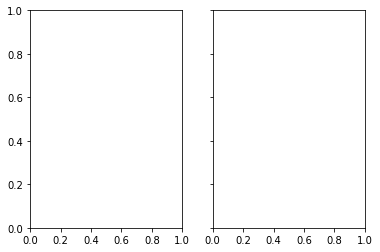

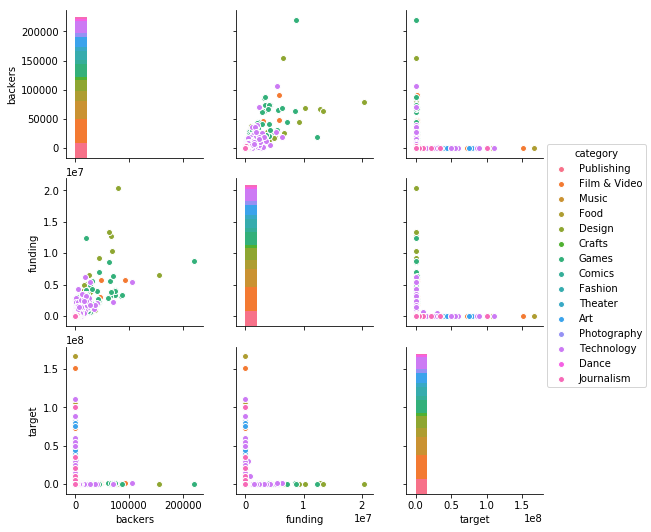

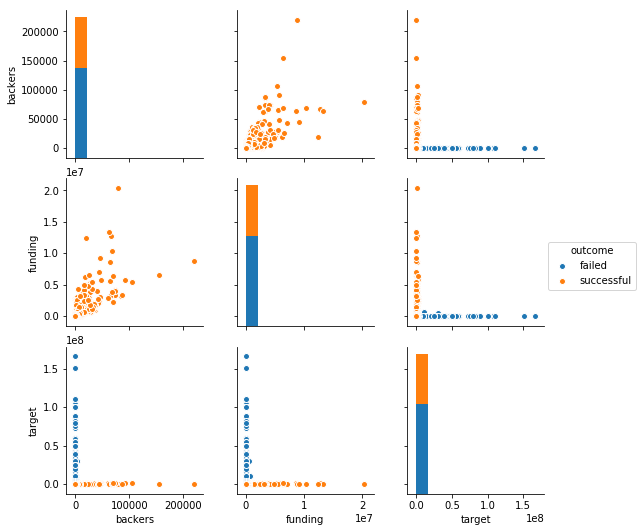

In [11]:
# Pair Plot of Original Data
# many outliers present in the two main numeric variables 

plair_plot = df_k3[["backers","funding","target","category","outcome"]]

f, axes = plt.subplots(ncols =2, sharey = True)

sns.pairplot(plair_plot, hue= "category" )

sns.pairplot(plair_plot, hue= "outcome" )


### 3.1.6 Data Normalisation 
 The Box-Cox power transformation was one of the few that met the requirements of the dataset and helped both scale and normalise it.


 'Normalised Dataset' : 
                  ID        backers        funding         target
count  3.195720e+05  319572.000000  319572.000000  319572.000000
mean   1.073726e+09       2.625017       8.669994       9.734058
std    6.189517e+08       1.587686       3.989225       2.068458
min    5.971000e+03       0.000000      -0.778085      -4.338916
25%    5.369676e+08       1.336329       5.800348       8.408151
50%    1.074020e+09       2.768857       8.899142       9.658424
75%    1.609012e+09       3.801920      11.453846      10.950856
max    2.147476e+09       9.021779      30.602137      23.815808


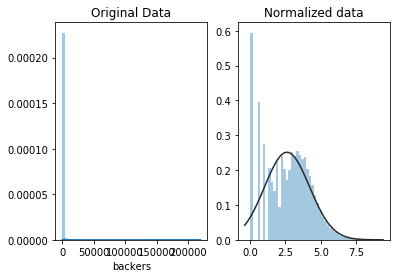

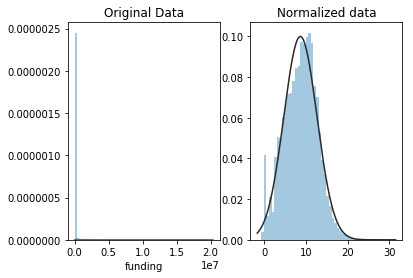

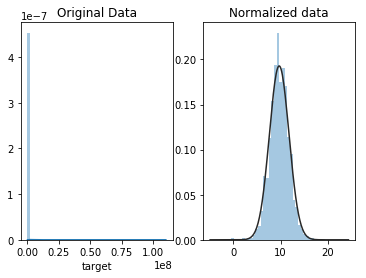

In [12]:
# creating function

def bc_normalisation (df):
    # only works on >0 values
    df = df[df.backers != 0]
    df = df[df.funding != 0]
    df = df[df.target != 0]
    numeric_features = df[["backers","funding","target"]]
    for feature in numeric_features:
        # normalize the pledges (w/ Box-Cox)
        normalized_pledges = stats.boxcox (df[feature])[0]

        # plot both together to compare
        fig, ax=plt.subplots(1,2)
        sns.distplot(df[feature], ax=ax[0])
        ax[0].set_title("Original Data")
        sns.distplot(normalized_pledges,kde=False, fit=stats.gamma, ax=ax[1])
        ax[1].set_title("Normalized data")
        df[feature] = normalized_pledges
    return df
# applying to dataset
df_k4 = bc_normalisation(df_k3);
print (header("Normalised Dataset"), df_k4.describe())



## 3.2. Summary (ii)
##### Overall a clean dataset that was well structured.
  - No duplicates.
  - USD currency conversions were provided. 
  - No missing data.

##### Changes. 
   - Subjectively removed irrelevant features. 
   - A new feature called outcomes was created to filter live/ended projects; the former being dropped to reduce bias.
   - Project states were changed into a binary form, successful / failed 
   - Columns were renamed.

##### Outliers 
   - The scatter matrix revealed that all numerical features demonstrated strong positive skews, 
   - Resulting in abnormal distributions. 
   - This encouraged a thorough review of methods to normalise the data.

##### Normalisation Issue
   - It proved extremely difficult to normalise the data. 
   - Cubic and z-score transformations worked well with the negative and zero values in the data, 
   - But failed to reduce the skew and normalise the distribution.  
   - Although the log transformation was best at normalising the distribution, it required the removal of 0, 1 and negative values, resulting in extreme data loss.
   - Min-Max scaling was also attempted. 
   
##### Solution 
   - The Box-Cox Power Transformation proved effective at tackling both the issue of scaling and normalising the data. 
   - The sole drawback was the loss projects that didn’t comply with the yi > 0 requirement (around 50,000). 
   - The Yeo-Jonson Transformation would be able to handle these values and produce a more accurate representation of the data,
   - However it is not currently supported in the scipy stats library (soon to be added). 


## 3.3. Indiegogo Data Wrangling 
### 3.3.1. Feature Selection
#### i) Removing Irrelevant and Redundant Features 

In [13]:
# Features that based on domain knowledge are unlikely to add predictive value to the model are removed.
# Created a new dataframe 


df_i2 = df_i.drop(["Unnamed: 0",         #irrelevant 
                   "card_type",           #irrelevant 
                   "category_slug",        #irrelevant 
                   "category_url",          #irrelevant 
                   "compressed_image_url",  # image processing not in the scope of the study
                   "friend_contributors",   #multiple missing values 
                   "friend_team_members",   # redundant 
                   "igg_image_url",    # image processing not in the scope of the study
                   "in_forever_funding",  #redudant for comparison
                   "partner_name",      # redudant for comparison
                   "source_url",        #irrelevant 
                   "url",             #irrelevant 
                   "tagline",             #no text analysis in study
                   "nearest_five_percent"] , axis = 1) #irrelevant, will use direct percentages 

#print(colours.HEADER+"\n\nRemaining Features:\n"+colours.ENDC,df_i2.columns)
#print(colours.HEADER+"\n\nFirst 5 Rows:\n"+colours.ENDC,df_i2.head())
#print (colours.HEADER+"\n\nData Types:\n"+colours.ENDC,df_i2.dtypes)

###  3.3.2. Cleaning Data
#### i) Filtering Live/ Ended Projects

In [14]:
# The values of some columns contain mixed types of values. 

mixed_variables = df_i2[["amt_time_left", "balance", "collected_percentage"]]
print(header("Features Require Cleaning"),mixed_variables.sample(3))

# amt_time_left => for projects converted to binary, (ended, other), drop other.
print (colours.HEADER+"\n\nAll Project States\n"+colours.ENDC,df_i2["amt_time_left"].count())

# amt_time_left replace with ended
replacements = {"No time left":"ended"}
df_i2["amt_time_left"].replace(replacements, inplace = True)

# drop all "other" projects except those that "ended" 
df_i3 = df_i2[ (df_i2["amt_time_left"] == 'ended')]

print (colours.HEADER+"\n\nOnly Completed Projects\n"+colours.ENDC, df_i3["amt_time_left"].value_counts())


 'Features Require Cleaning' : 
        amt_time_left balance collected_percentage
86500   No time left  £1,021                  10%
118800  No time left  $1,220                  24%
10357   No time left  $2,180                   3%


All Project States
 275604


Only Completed Projects
 ended    260299
Name: amt_time_left, dtype: int64


#### ii) Convert Currencies to type Numeric

In [15]:
# collected_percentage & balance => convert to numeric, remove %, currencies

# used regex 
for col in ['balance', 'collected_percentage']:
    df_i3[col] = pd.to_numeric(df_i3[col].str.replace(r"\D",'')) # "\D"	Match any non-digit

# collected_percentage must be transformed into a ratio to match Kickstarter variable.
df_i3["collected_percentage"] = df_i3["collected_percentage"]/100 # % to ratio

print("Updated balance\n",df_i3.balance.head(),"\n\nUpdated collected_percentage\n", df_i3.collected_percentage.head() )

Updated balance
 463       93
565       93
917    87656
918    47028
919    26100
Name: balance, dtype: int64 

Updated collected_percentage
 463    0.09
565    0.09
917    0.00
918    0.09
919    0.23
Name: collected_percentage, dtype: float64


#### iii) Currency Conversion
- FX rates had to be applied to each "balance" value according to its "currency_code".
    - Firstly, the currency strings in "currency_code" where replaced with the associated rates
    - With the intention of multiplying the rate by the balance column to created the "converted" balances. 
    - However, some balances (6088) had a value of 0, thus producing an error when multiplied. These values were converted into 1. 100 projects had a balance of 1 originally. 
    - A bias has been added, however it is necessary for new feature derivation calculations. 

In [16]:
balance_0 = df_i3["currency_code"][(df_i3["balance"] == 0)].count()
# 6088 projects have a balance of 0

balance_1 = df_i3["currency_code"][(df_i3["balance"] == 1)].count()
# 100 projects raised only 1 USD 

#print ("Balance of 0 USD: ",balance_0,"\n\nBalance of 1 USD: ", balance_1)

df_i3['balance'] = df_i3['balance'].replace([0],1) # convert all balances to 1. remove 0s 
df_i3[(df_i3["balance"] == 0)].count()# no more 1USD left 

# Rates 
# The mean 2017 national exchange rate for each currency was converted into USD, in a dictionary.
# Based on OECD data: https://data.oecd.org/conversion/exchange-rates.htm

fx_rate = { "USD": 1,      # dollar-denominated unchanged, but in numeric format now
            "GBP": 0.777,
            "EUR": 0.887,
            "CAD": 1.298,
            "AUD": 1.305,
          }

# replace currency code with rates 
df_i3["currency_code"].replace(fx_rate, inplace = True)

# create new "converted" column 
df_i3["converted"] = df_i3["currency_code"]*df_i3["balance"]

print(header("Result of Currency Conversion"),df_i3[["balance","currency_code","converted"]].head())


 'Result of Currency Conversion' : 
      balance  currency_code  converted
463       93          1.000     93.000
565       93          1.000     93.000
917    87656          0.777  68108.712
918    47028          1.000  47028.000
919    26100          1.000  26100.000


#### iv)  Dublicate Removal
- Many projects on Indiegogo run several concurrent campaigns
- Also, as a result of scraping, a single project may be captured multiple times at different funding stages. 
- Since no time component is present in the dataset, balance will be used as an indication of funding time.
- So that for the same project, only the highest funding row is kept, with dublicates dropped. 

In [17]:
# The study will only consider projects that have ended (1), in order to reduce bias.
    
# Identified duplicates
id_dublicates = df_i3.groupby(['id'])['balance'].transform(max) == df_i3['balance']

# Assume the most updated status is the record with the max number in balance
df_i3 = df_i3[id_dublicates].drop_duplicates()

print(colours.HEADER+"\n\nOriginal Dataset:\n"+colours.ENDC,df_i.shape)
print(colours.HEADER+"\n\nW/O Duplicates:\n"+colours.ENDC,df_i3.shape)




Original Dataset:
 (275604, 22)


W/O Duplicates:
 (78105, 9)


- Remocing Duplicates has significantly reduced the dataset's size by 2/3. 
- From 275604 rows and 22 columns, we have reduced it to 78105 rows and 8 columns. 

### 3.3.3. Missing Data

In [18]:
# Finding Proportion of missing cells 

print(cell_missing_perc(df_i3))

print (header("Title missing >5% of values. Temporarily keep to easily distinuish between projects"))



% Missing Cells
 amt_time_left                     0.000000
balance                           0.000000
cached_collected_pledges_count    0.000000
category_name                     0.000000
collected_percentage              0.000000
currency_code                     0.000000
id                                0.000000
title                             0.004552
converted                         0.000000
dtype: float64
None

 'Title missing >5% of values. Temporarily keep to easily distinuish between projects' : 



### 3.3.4. Standardising Column Names
Identical variables with same column names will help merge the two datasets

In [19]:
print(colours.HEADER+"\n\nOld Column Names:\n"+colours.ENDC,df_i3.columns)

# cached_collected_pledges_count is not explicitely defined by the dataset
# author, but will be interpreted as unique backers, following a similar 
# pattern observed in other reports.

# Updating names
df_i3.rename(index = str, columns = {
                                    "amt_time_left":"state", 
                                    "converted":"funding",
                                    "cached_collected_pledges_count":"backers",
                                    "category_name":"category",
                                    "collected_percentage":"funding_ratio"
                                    } , inplace = True)

#print(colours.HEADER+"\n\nUpdated Column Names\n"+colours.ENDC, df_i3.columns)



Old Column Names:
 Index(['amt_time_left', 'balance', 'cached_collected_pledges_count',
       'category_name', 'collected_percentage', 'currency_code', 'id', 'title',
       'converted'],
      dtype='object')


### 3.3.5. Missing Features

- The Indiegogo Dataset is missing several crucial features, such as a "target" and "outcome" attributes.
- These will be created below and not in the Feature Engineering section, to avoid distortion by the tranformation.

####  i) Deriving "funding_ratio"  
- "funding_ratio" with a value of 0 arises in 11570 projects.
- The crucial feature "target" is created on its basis. However, due to the poor quality of the dataset, the project's target can only by calculated for non-zero values. 
- Imputation is the only reasonable solution. 
 

In [20]:
#FUNDING RATIO

# some funding_ratio values are 0
#df_i3.loc[df_i3["target"] == np.inf, "target"] = np.nan

df_i3["funding_ratio"]
df_i3.loc[df_i3["funding_ratio"] == 0]
# duplicate

#CANNOT IMPUTATE THIS 
# where 0 or NaN, inputate with mean of category

# 1) Created crucial feature "target", derived using funding and funding_ratio. 
df_i3["target"] = (df_i3['funding'])/(df_i3['funding_ratio'])
#df_i3["target"].value_counts()  # due to inf 11570

####  ii) Deriving "target"  
- Where "target" has NaN values, the median of the project category will be used instead.

In [21]:



#df_i3["target"].value_counts()  # due to funding_ratio 0 vals, inf 11570 in target.
#df_i3.groupby(["funding_ratio"])["target"].value_counts()

#  ATTEMPT 1 
# replace "inf" with median "target". 
#df_i3["target"].replace(np.inf, df_i3["target"].median() , inplace = True)
# Inputation replaced 11570 out of 78105 
# or 15% of values with the same median value of 9782. 
# This is a terrible result...
#df_i3["target"].value_counts().head()

#  ATTEMPT 2

def target_local_medians (df_name):  
    # category names in df (33)
    categories_i = list(df_name["category"].unique())
    # dict of local medians 
    target_median = df_name.groupby(["category"])["target"].describe()
    medians_dict = dict(target_median["50%"])
    # replace value inf with appropriate local median
    for name in categories_i:
        cat_values = df_name["target"].loc[df_name["category"]== name]
        median_value = medians_dict[name]
        cat_values.replace(np.inf,median_value, inplace = True)
        # replace the values in the given df
        df_name["target"].loc[df_name["category"]== name] = cat_values
    return df_i3

target_local_medians(df_i3)
# Result 
df_i3["target"].value_counts().head()

# The second method is much better, because of the even spread of imputated target values.

# Attempt 3
    # Drop rows. This would have created a tremendous bias by removing failed projects.
    # along with 15% of the rows. 
    

8008.955224     2131
16118.142857    1709
10000.000000    1256
20328.571429     880
24679.310345     846
Name: target, dtype: int64

#### iii) Updating funding_ratio

In [22]:
# Now that all "target" values are avaialable,
# updated funding_ratio, which had 0s originally.
df_i3["funding_ratio"]= df_i3["funding"]/df_i3["target"]

#### iv) Derived project  "outcome" 

In [23]:
# this will ensure "outcome" values are correcty calculated
df_i3['outcome'] = df_i3['funding_ratio'].apply(lambda x: np.where(x >= 1,"successful","failed"))

#df_i3.loc[df_i3["id"] == 1704770
print (colours.HEADER+"\n\nCleaned Indiegogo Dataset\n"+colours.ENDC, df_i3.head())



Cleaned Indiegogo Dataset
      state  balance  backers          category  funding_ratio  currency_code  \
463  ended       93       16       Video Games       0.090000          1.000   
917  ended    87656     2280  Local Businesses       4.225593          0.777   
918  ended    47028       67  Local Businesses       0.090000          1.000   
919  ended    26100       69  Local Businesses       0.230000          1.000   
920  ended    23486       60  Local Businesses       0.230000          1.000   

          id                                              title    funding  \
463  2011603                    Rise Of Kings: Medieval Warfare     93.000   
917  1378278                                  Campaign finished  68108.712   
918   788947                 Help Lakeshore Express GoGo Again!  47028.000   
919   107926                                The Musea Gathering  26100.000   
920   743288  Bexplorer - a community for adventurous travelers  23486.000   

            target   

### 3.3.6. Initial Outlier Identification

In [24]:
# The "funding" value of 1 will likely produce a significant positive skew.
print( header("Top 5 values for funding"), df_i3["funding"].value_counts().head())
print( header("Top 5 values for backers"), df_i3["backers"].value_counts().head())
print( header("Top 5 values for target"), df_i3["target"].value_counts().head())


 'Top 5 values for funding' : 
 1.0      2671
150.0     370
200.0     360
100.0     324
60.0      297
Name: funding, dtype: int64

 'Top 5 values for backers' : 
 2    5199
3    3958
0    3277
4    3201
5    2816
Name: backers, dtype: int64

 'Top 5 values for target' : 
 8008.955224     2131
16118.142857    1709
10000.000000    1256
20328.571429     880
24679.310345     846
Name: target, dtype: int64


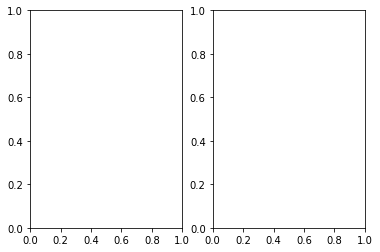

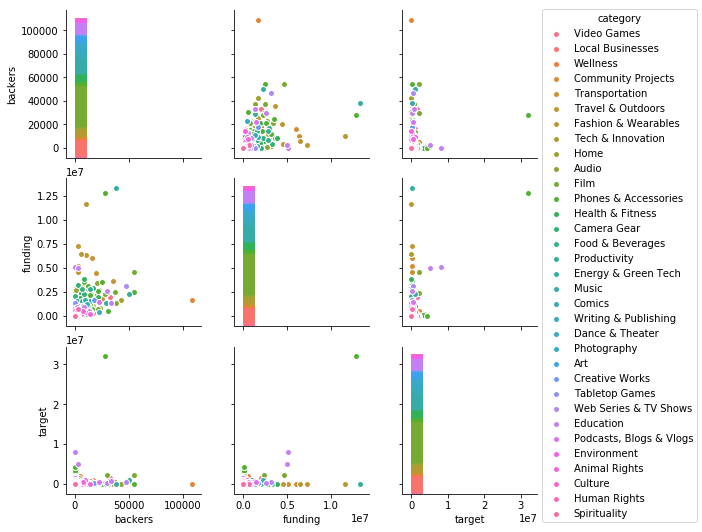

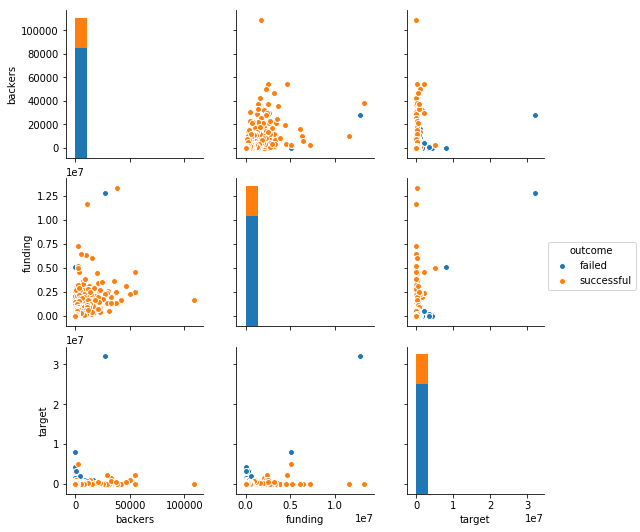

In [25]:
# Pair Plot of Original Data


plair_plot = df_i3[["backers","funding","target","category","outcome"]]

figure, axes = plt.subplots(1, 2)
sns.pairplot(plair_plot, hue= "category" )
sns.pairplot(plair_plot, hue= "outcome" )

### 3.3.7 Data Normalisation 
#### i) Box-Cox Power Transformation


 'Normalised Dataset' : 
             balance        backers  funding_ratio  currency_code  \
count  7.810500e+04   78105.000000   78105.000000   78105.000000   
mean   1.572237e+04     106.383676       0.802287       0.995519   
std    1.421434e+05     896.382335       4.933393       0.101566   
min    1.000000e+00       0.000000       0.000010       0.777000   
25%    2.600000e+02       6.000000       0.030000       1.000000   
50%    1.155000e+03      18.000000       0.200000       1.000000   
75%    4.235000e+03      53.000000       0.750000       1.000000   
max    1.328835e+07  108654.000000     571.098370       1.305000   

                 id       funding        target  
count  7.810500e+04  7.810500e+04  7.810500e+04  
mean   1.449665e+06  1.569062e+04  1.927789e+04  
std    5.880358e+05  1.417581e+05  1.301927e+05  
min    1.020000e+02  7.770000e-01  1.842105e+02  
25%    1.155632e+06  2.550000e+02  3.158065e+03  
50%    1.515226e+06  1.148000e+03  8.008955e+03  
75%    1.9

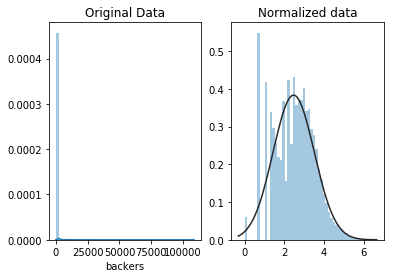

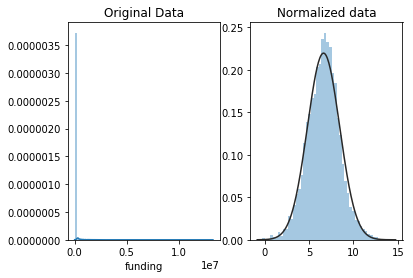

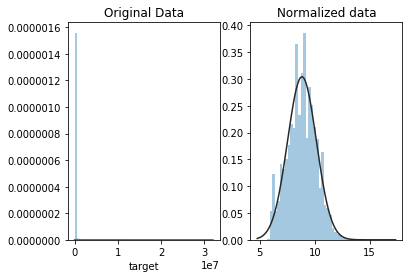

In [26]:

df_i4 = bc_normalisation(df_i3);
print (header("Normalised Dataset"), df_i3.describe())

## 3.4. Summary (iii)

##### A poor quality dataset, badly structured and missing crucial features.
   - Monthly crawls created several duplicates for each project with varying balances and states.
   - Balances in multiple currencies requiring conversion to USD.    
   - But were excluded as they fell outside the target scope of this study.
   - Essential features missing. Must be derived, which will introduce biases through errors and generalisations.

##### Changes 
   -  Subjectively removed irrelevant features. 
   - Dropped live projects.
   - Features converted to numeric, removed currency signs. 
   - Balances converted to USD using the respective 2017 Exchange Rate. Since no time element present, exact conversion were impossible. This introduced a bias.
   - Duplicates removed on the basis of their highest balance value. This reduced the dataset to 78,000 projects. (From 275,000).
   - Columns were renamed.
   - Created new features to match Kickstarter Dataset.
##### Features Imputation
   - Imputation was used to derive essential features and posed a significant challenge. 
   -  Values of 0 led to inf and NaN values in "funding_ratio". A duplicate column substituting 0s with 1s was created for the denominator. No bias was introduced since the numerator corresponded to 0. (0 backers = 0 funding)
   - Target was reverse-engineered on the basis of “balance” and “funding %”. NaN values had to be substituted with different values. 
   - Various approaches were adopted to improve accuracy. 1) The median, being more resistant to outliers, proved a more fitting replacement than the mean. 2) Using the median of individual categories for the corresponding projects, instead of the median of the dataset, boosted accuracy considerably. 
   - Having the “target” enabled the accurate replacement of 0 values in “funding_ratio”.

##### Outliers 
   - As with kickstarter, all numerical features demonstrated strong positive skews and abnormal distributions. 

##### Normalisation Issue
   - The Box-Cox Power Transformation proved effective on this dataset as well.

# 4. Data Exploration
## 4.1. Kickstarter
### 4.1.1. Visual Data Analysis	 
#### i ) Scatter Matrix

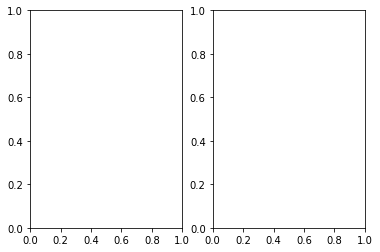

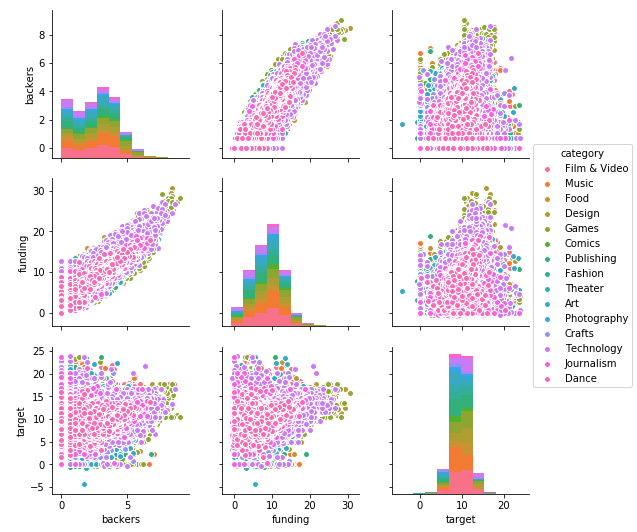

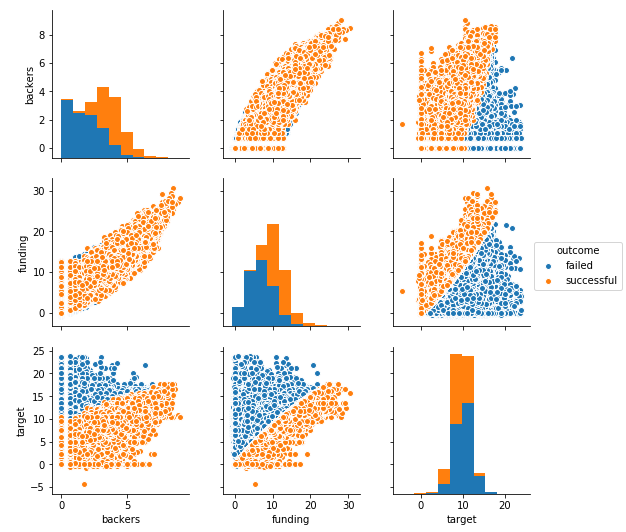

In [27]:
# Pair Plot of Normalised data
plair_plot = df_k4[["backers","funding","target","category","outcome"]]

figure, axes = plt.subplots(1, 2)
sns.pairplot(plair_plot, hue= "category" )
sns.pairplot(plair_plot, hue= "outcome" )

#### ii) Hexbin

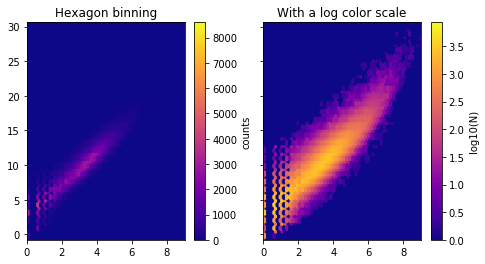

In [28]:
x = df_k4["backers"]
y = df_k4["funding"]
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='plasma')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='plasma')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

#### ii) Quantile-Quantile Plot

Text(0.5,1,'Target')

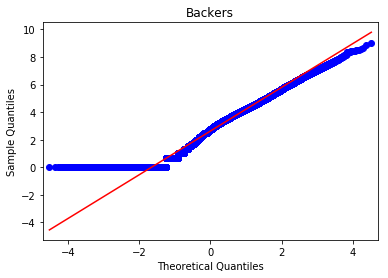

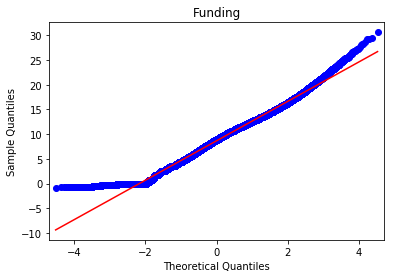

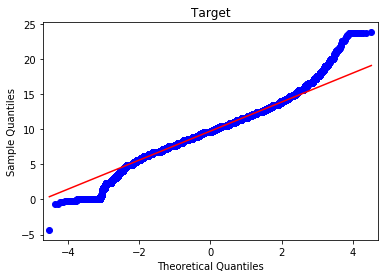

In [29]:
# generate univariate observations
qq_data = df_k4["backers"]  
qqplot(qq_data, line='s')
plt.title("Backers")

qq_data = df_k4["funding"]  
qqplot(qq_data, line='s')
plt.title("Funding")

qq_data = df_k4["target"]  
qqplot(qq_data, line='s')
plt.title("Target")

### 4.1.2. Statistical Analysis
#### i) Kruskal-Wallis H-test

In [30]:
# Kruskal-Wallis H-test
# generate three independent samples
data1 = df_k4["funding"]
data2 = df_k4["backers"]
data3 = df_k4["target"]
# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=219190311537.398, p=0.000
Different distributions (reject H0)


### 4.1.3. Outlier Visualisation
#### i) BOXPLOTS

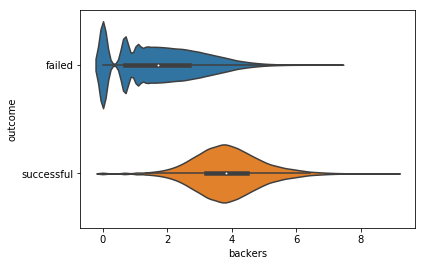

In [31]:
# success / failure visualisation is more useful in explaining the distribution 
boxplots = df_k4[["backers","funding","target","category","outcome"]]
df = boxplots
sns.violinplot( y=df["outcome"], x=df["backers"] )

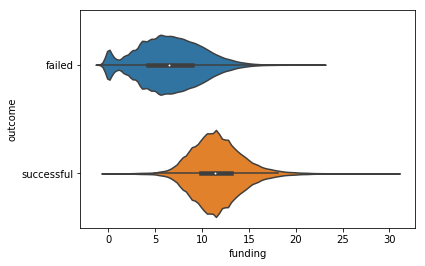

In [32]:
sns.violinplot( y=df["outcome"], x=df["funding"] )

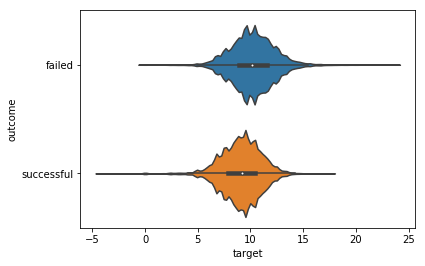

In [33]:
sns.violinplot( y=df["outcome"], x=df["target"] )

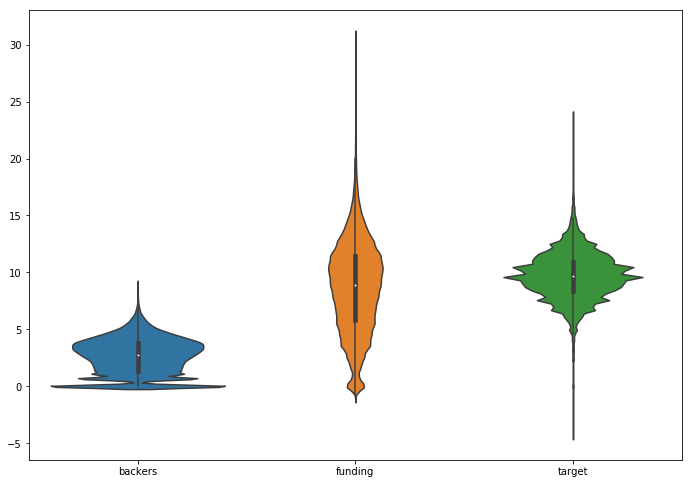

In [34]:
a4_dims = (11.7, 8.27)
df = boxplots
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, data=df)

#### ii) Identify Outliers, 3std from Mean

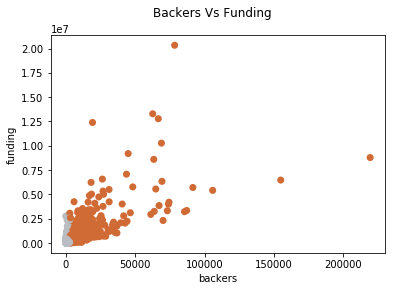

In [35]:
# Explore least normal distributions, Backers and Funding.
# Template by @author: sbbk529, City University London

def plot_outliers(df_name):
    # create additional columns filled with 0 values
    df_name["backers_out"] = 0 
    df_name["funding_out"] = 0
    # save the mean and standard deviation in variables
    backers_m = df_name['backers'].mean()
    backers_std = df_name['backers'].std()

    funding_m = df_name['funding'].mean()
    funding_std = df_name['funding'].std()

    # identifies outliers, marks outliers as 1 
    df_name['backers_out'] = np.where(abs(df_name['backers'] - backers_m) > 3 * backers_std, 1, 0)
    df_name['absfunding_out'] = np.where(abs(df_name['funding'] - funding_m) > 3 * funding_std, 1, 0)
    
    #Colour outliers
    colorColumn = []
    for i in range(len(df_name)):
        if df_name["backers_out"][i] == 1:
            colorColumn.append("#D06B36") # orange color
        elif df_name["funding_out"][i] == 1:
            colorColumn.append("#40A0C9") # a blueish color
        else:
            colorColumn.append("#B9BCC0") # gray
    
    #Plot outliers 
    plt.xlabel('backers')
    plt.suptitle('Backers Vs Funding')
    plt.ylabel('funding')
    plt.scatter(df_name.backers, df_name.funding, c = colorColumn, s = 50, linewidth= 0)

    # drop outlier column
    df_name.drop(["backers_out","funding_out"],1)    
    
plot_outliers(df_k3)    

#### iii) Outlier Removal

## 4.2. Data Exploration
### 4.2.1. Visual Data Analysis	
#### i) Scater Matrix

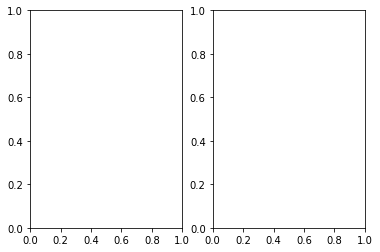

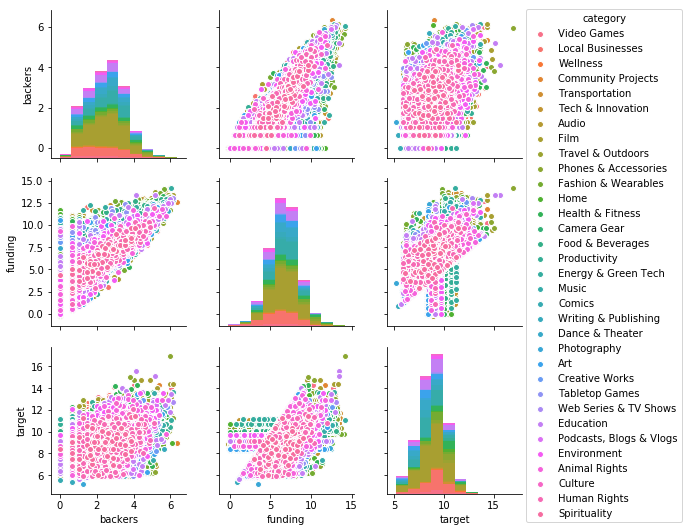

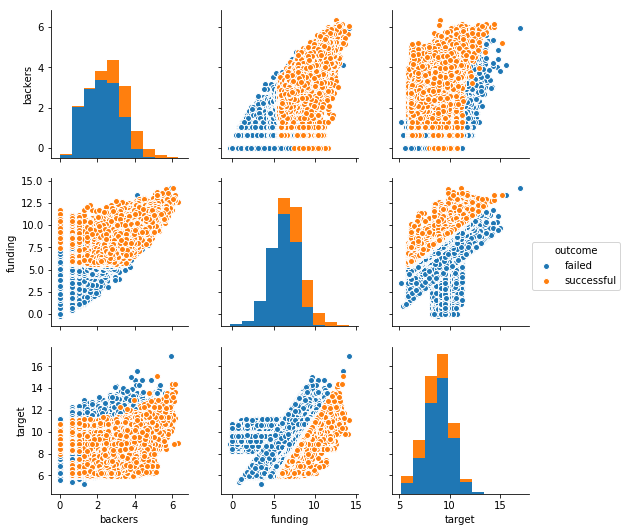

In [36]:
# Pair Plot of Normalised data

plair_plot = df_i4[["backers","funding","target","category","outcome"]]

figure, axes = plt.subplots(1, 2)
sns.pairplot(plair_plot, hue= "category" )
sns.pairplot(plair_plot, hue= "outcome" )

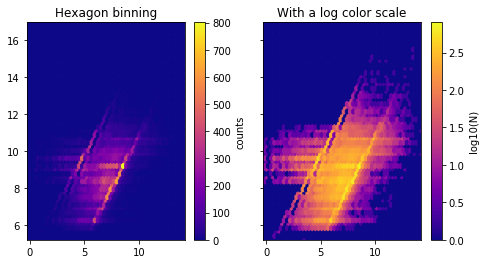

In [37]:
x = df_i4["funding"]
y = df_i4["target"]
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='plasma') #colours https://matplotlib.org/examples/color/colormaps_reference.html
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='plasma')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

#### ii) Quantile-Quantile Plot

Text(0.5,1,'Target')

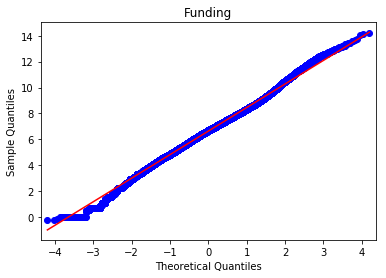

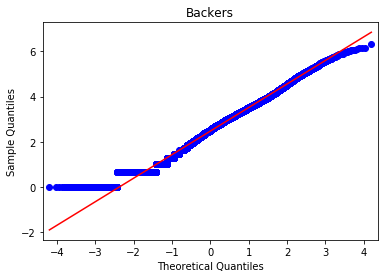

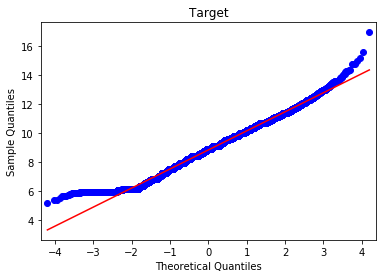

In [38]:
data1 = df_i4["funding"]
data2 = df_i4["backers"]
data3 = df_i4["target"]

qqplot(data1, line='s')
plt.title("Funding")

qqplot(data2, line='s')
plt.title("Backers")

qqplot(data3, line='s')
plt.title("Target")

### 4.2.2. Statistical Analysis
#### i) Kruskal-Wallis H-test

In [39]:
# generate three independent samples

# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-37635944.520, p=1.000
Same distributions (fail to reject H0)


### 4.2.3. Outliers Visualisation
#### i) Violin Plots

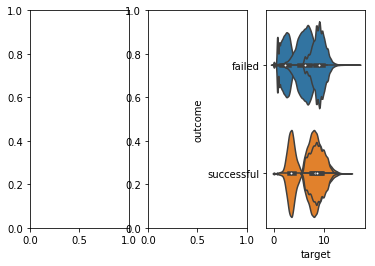

In [40]:
# Load the example tips dataset
boxplots_i = df_i4[["backers","funding","target","category","outcome"]]


fig, axs = plt.subplots(ncols=3)

# Just switch x and y
sns.violinplot( y=boxplots_i["outcome"], x=boxplots_i["backers"] )



df = boxplots
# Just switch x and y
sns.violinplot( y=boxplots_i["outcome"], x=boxplots_i["funding"] )



df = boxplots
# Just switch x and y
sns.violinplot( y=boxplots_i["outcome"], x=boxplots_i["target"] )

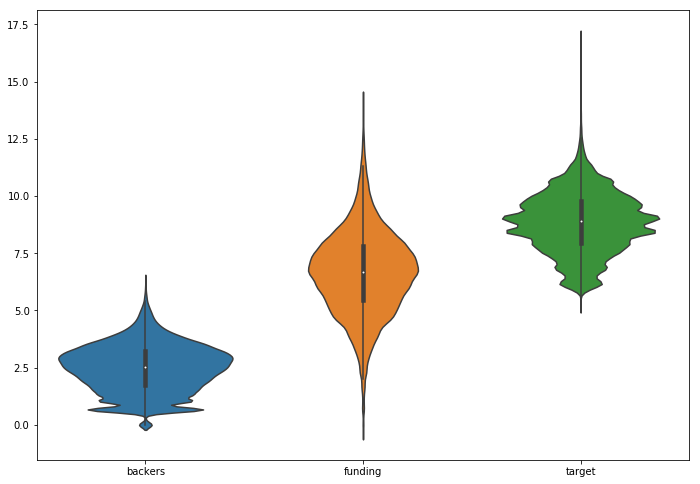

In [41]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, data=boxplots_i)

#### ii) Plot Outliers 

- As in the Kickstarter Dataset, this method of detecting outliers was not effective due to the skew of the dataset and thus no values were removed.

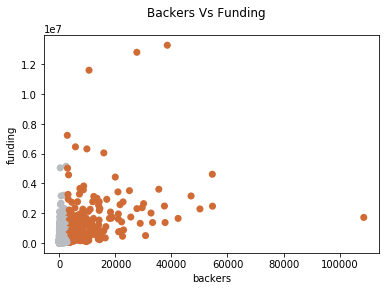

In [42]:
# Explore most least normal distributions, Backers and Funding

def plot_outliers(df_name):
    # create additional columns filled with 0 values
    df_name["backers_out"] = 0 
    df_name["funding_out"] = 0
    # save the mean and standard deviation in variables
    backers_m = df_name['backers'].mean()
    backers_std = df_name['backers'].std()

    funding_m = df_name['funding'].mean()
    funding_std = df_name['funding'].std()

    # identifies outliers, marks outliers as 1 
    df_name['backers_out'] = np.where(abs(df_name['backers'] - backers_m) > 3 * backers_std, 1, 0)
    df_name['absfunding_out'] = np.where(abs(df_name['funding'] - funding_m) > 3 * funding_std, 1, 0)
    
    #Colour outliers
    colorColumn = []
    for i in range(len(df_name)):
        if df_name["backers_out"][i] == 1:
            colorColumn.append("#D06B36") # orange color
        elif df_name["funding_out"][i] == 1:
            colorColumn.append("#40A0C9") # a blueish color
        else:
            colorColumn.append("#B9BCC0") # gray
    
    #Plot outliers 
    plt.xlabel('backers')
    plt.suptitle('Backers Vs Funding')
    plt.ylabel('funding')
    plt.scatter(df_name.backers, df_name.funding, c = colorColumn, s = 50, linewidth= 0)

    # drop outlier column
    df_name.drop(["backers_out","funding_out"],1)    
    
plot_outliers(df_i3)    

#### iii) Outlier Removal

## 4.4. Summary (iv) 

##### Pair Plot (Scatter Matrix)  
- Helped assess the transformation, as per the distribution, skew and kurtosis.
- Useful for uncoverign correlations. 

##### Hexbin 
- “Hexagon binning is a form of bivariate histogram useful for visualizing the structure in datasets with large n.”[4].
- It supplemented the pair plot.
- Colouring values by density revealed gaps and shears in the values close to 0. 
- Indicating issues with the data.
- Particularly useful for the Indiegogo dataset, where "#" gridelike value distributions became apparent.
- An important consideration for research.

##### Q-Q plot
- An easy to interpret method to compare the distribution of every quartile of a feature to an idealised Guassian distribution, 
- Which is represented by the 45degree line. 

##### Kruskal-Wallis H-test
- Due to the visual analysis of the data, a non-parametric statistical data was employed to evaluate the data's distribution.
- The Kruskal-Wallis test is a nonparametric version of the one-way analysis of variance test. A rejection of the null hypothesis indicates that there is enough evidence to suggest that one or more samples dominate another sample.[5]
- This rejection of H0 urged the Author to use a more robust model for regression (Decision Trees).

##### Outliers
- The Violin Plots helped pinpoint the cause of the abnormal distribution.
- Outliers should be rare. If they are not rare, the method (and hence the entire data set) is bad and/or not trustworthy. [2] 

##### Approaches
- Removing outliers even at 3std from either the mean or median decimated the dataset, to the point of being counter-productive.
- Winsorizing was attempted, but the high number of outliers made it ineffective.
- Trimming the dataset did not solve the issue either, producing visible missing section on either side of the distribution. 

##### Conclusion 
- Closer examination of the data and discussions with domain experts, led to the conclusion that the outliers were valid data points.


# 5. Feature Engineering
## 5.1. Overview
Several new features were derived to be added as inputs to the models.
## 5.2. New Features
### 5.2.1. Kickstarter    
#### i) funding_ratio

In [43]:
# TARGET FIX
# target must be set to 1, for all 0 values so as to caclulate funding ratio
df_k4["target"].replace(0,1, inplace=True)

# Derive Funding Ratio
df_k4["funding_ratio"] = df_k4["funding"]/df_k4["target"]

#### ii) funding_gap

In [44]:
df_k4["funding_gap"] = df_k4["funding"]-df_k4["target"]

#### iii) platform

In [45]:
df_k4["platform"] = "Kick"

#### iv) avg_backer_funding

In [46]:
# FIX. Dublicated column and replaced 0 with 1 to allow avg backer funding calculation.
# This will not affect the value as the numerator (funding) is itself 0.
df_k4["backers_temp"] = df_k4["backers"]
df_k4["backers_temp"].replace(0,1,inplace=True)

#calculation 
df_k4["avg_backer_funding"] = df_k4["funding"]/df_k4["backers_temp"]

# now redundant 
df_k4.drop(["backers_temp"],axis =1 );

#### v) survival_rate was tricky...

In [47]:
# function calculating ratio project success/failure per category  
def single_cat_ratio (cat_name,df_name):   #cat_name str
    # find successful by category
    cat_scf = dict(df_name.groupby(["category"])["outcome"].value_counts())
    # find category count
    cat_ttl = dict(df_name.groupby(["category"])["funding_ratio"].count())
    ratio = cat_scf[cat_name, "successful"] / cat_ttl[cat_name]
    return ratio

# function that devides "single_cat_ratio" by total projects in category.
def all_cat_ratio(df_name):
    cat_list = list(df_name["category"].unique())
    ratio_dict = {}
    for i in cat_list:
        ratio_dict[i] = single_cat_ratio(i,df_name)  
    return ratio_dict

# function for median funding per category
def all_median_funding(df_name): # now part of survival_calc
    fun_ratio = df_name.groupby(["category"])["funding_ratio"].describe()
    fun_ratio_median= dict(fun_ratio["50%"]) # median 
    return fun_ratio_median

# function that multiples  all_cat_ratio,all_median_funding 
# to calculate survival_rate.
# Simply state the dataset! (provided same format)
def survival_calc (df_name):
    ls = []
    lf = []
    sv1 = all_cat_ratio(df_name)           #call function ratio1 
    fun_ratio_median = all_median_funding(df_name) #call function ratio2
    for s in sv1.values():
        ls.append(s)
    for f in fun_ratio_median.values():
        lf.append(f)
    survival_rate = [a*b for a,b in zip(ls,lf)]
    # created dict
    values = [(a*b) for a,b in zip(ls,lf)] #multiplied by 100 to be easier to interpret
    #k = (sv1.values() * w.values())
    keys = list(df_name["category"].unique())
    # created 2nd dict 
    survival_rate = dict(zip(keys,values))
    return survival_rate

# Function to automatically generate survival_rate in a specified df.
def create_survival_rate(df_name):
    survival_rate = survival_calc(df_name)# called survival_calc
    #  duplicate "category" and replace with associated values
    df_name["survival_rate"] = df_name["category"]
    df_name["survival_rate"].replace(survival_rate, inplace = True)
    print (colours.HEADER+"survival_rate Created - Consistent\n"+colours.ENDC,df_name[["category","survival_rate"]].head())
    return df_name.groupby(["category"])["survival_rate"].unique()

#created "survival_rate" for fd_k3
survival_kick = create_survival_rate(df_k4);    # Could be interesting visualisation 
#print(colours.HEADER+"\nsurvival_rate by Category: \n"+colours.ENDC,survival_kick)


survival_rate Created - Consistent
        category  survival_rate
1  Film & Video       0.472420
2  Film & Video       0.472420
3         Music       0.673304
4  Film & Video       0.472420
5          Food       0.230291


### 5.2.2. Dataset Check (Kick)
#### i) Descriptive Stats 

In [48]:
print (colours.HEADER+"\n\nCleaned Kickstarter Dataset\n"+colours.ENDC, df_k4.describe())



Cleaned Kickstarter Dataset
                  ID        backers        funding         target  \
count  3.195720e+05  319572.000000  319572.000000  319572.000000   
mean   1.073726e+09       2.625017       8.669994       9.734900   
std    6.189517e+08       1.587686       3.989225       2.064697   
min    5.971000e+03       0.000000      -0.778085      -4.338916   
25%    5.369676e+08       1.336329       5.800348       8.408151   
50%    1.074020e+09       2.768857       8.899142       9.658424   
75%    1.609012e+09       3.801920      11.453846      10.950856   
max    2.147476e+09       9.021779      30.602137      23.815808   

       funding_ratio    funding_gap   backers_temp  avg_backer_funding  \
count  319572.000000  319572.000000  319572.000000       319572.000000   
mean        0.915018      -1.064906       2.732286            3.434712   
std         1.051219       4.043269       1.432950            1.407916   
min      -444.885057     -23.658890       0.680503          

#### ii) Missing Values

In [49]:
print(cell_missing_perc(df_k4))



% Missing Cells
 ID                    0.0
category              0.0
state                 0.0
backers               0.0
funding               0.0
target                0.0
outcome               0.0
funding_ratio         0.0
funding_gap           0.0
platform              0.0
backers_temp          0.0
avg_backer_funding    0.0
survival_rate         0.0
dtype: float64
None


### 5.2.3. Indiegogo
#### i) avg_backer_funding

In [50]:
df_i4["backers_temp"] = df_i4["backers"]
df_i4["backers_temp"].replace(0,1,inplace=True)

#calc 
df_i4["avg_backer_funding"] = df_i4["funding"]/df_i4["backers_temp"]

# now redundant 
df_i4.drop(["backers_temp"],axis =1 );

#### ii) funding_gap

In [51]:
df_i4["funding_gap"] = df_i4["funding"]-df_i4["target"]

#### iii) platform

In [52]:
df_i4["platform"] = "Indie"

#### iv) survival_rate

In [53]:
survival_indie = create_survival_rate(df_i4) # Could be interesting visualisation 
#print(colours.HEADER+"\nsurvival_rate by Category: \n"+colours.ENDC,survival_indie)

survival_rate Created - Consistent
              category  survival_rate
463       Video Games       0.031714
917  Local Businesses       0.039354
918  Local Businesses       0.039354
919  Local Businesses       0.039354
920  Local Businesses       0.039354


### 5.2.4. Dataset Check (indie)
#### i) Descriptive Stats 

In [54]:
print (colours.HEADER+"\n\nCleaned Indiegogo Dataset\n"+colours.ENDC, df_i4.describe())



Cleaned Indiegogo Dataset
             balance       backers  funding_ratio  currency_code            id  \
count  7.482800e+04  74828.000000   74828.000000   74828.000000  7.482800e+04   
mean   1.629055e+04      2.472469       0.829448       0.995670  1.430567e+06   
std    1.451427e+05      1.041446       5.018910       0.102375  5.888309e+05   
min    1.000000e+00      0.000000       0.000020       0.777000  1.020000e+02   
25%    3.200000e+02      1.739651       0.040000       1.000000  1.143662e+06   
50%    1.260000e+03      2.525646       0.220000       1.000000  1.491105e+06   
75%    4.460250e+03      3.207925       0.790000       1.000000  1.932234e+06   
max    1.328835e+07      6.334840     571.098370       1.305000  2.294345e+06   

            funding        target  backers_temp  avg_backer_funding  \
count  74828.000000  74828.000000  74828.000000        74828.000000   
mean       6.642301      8.838212      2.480100            3.015308   
std        1.815680      1.3

#### ii) Missing Values

In [55]:
# Checking for missing cells 
print(cell_missing_perc(df_i4))



% Missing Cells
 state                 0.000000
balance               0.000000
backers               0.000000
category              0.000000
funding_ratio         0.000000
currency_code         0.000000
id                    0.000000
title                 0.002422
funding               0.000000
target                0.000000
outcome               0.000000
backers_temp          0.000000
avg_backer_funding    0.000000
funding_gap           0.000000
platform              0.000000
survival_rate         0.000000
dtype: float64
None


### 5.2.5. Save Datasets
- Backup

In [56]:
#Kick
df_k4.to_csv("df_k4.csv")
#Indie
df_i4.to_csv("df_i4.csv")

## 5.3. Summary (v)
#####  Features Generated 
- target: The crowdfunding campaign's stated minimum funding goal.

0 values as a result of transformation. Were set to 1 to enable the calculations of funding_ratio. 
- funding_ratio: The funding to target ratio of a project, which indicates both whether a project succeeded/failed and by what margin.
- platform: The platform  the project was crowdfunding on.
- outcome: Whether a project succeeded/failed to achieve its target.
- funding_gap: The deficit/surplus funding in relation to the project's target. A dollar amount feature that is easy to interpret. 
- avg_backer_funding: Indicator of demand/support for a campaign.

0 values had to be set to 1.
- survival_rate: A measure of category Success Rate (S/T) * Funding Rate (Funding/Target). 

The innovation of this feature was that a category-based value was generated, thereby highlighting the inter-category funding difficulty of projects.
The median funding_rate proved more resistant to outliers than the mean.

# 6. Format Data
## 6.1. Regression Feature Selection 

In [57]:
##CONTINGENCY 
#kR = pd.read_csv("df_k4.csv")
#iR = pd.read_csv("df_i4.csv")

### 6.1.1. Redundant Features

In [58]:
# Kickstarter 
kR = df_k4[["category","target","avg_backer_funding","survival_rate","funding_gap","funding_ratio","backers","funding","outcome"]]
# Indiegogo 
iR = df_i4[["category","target","avg_backer_funding","survival_rate","funding_gap","funding_ratio","backers","funding","outcome"]]
print(kR.columns,"\n\n", iR.columns ) # Inspect remaining columns

Index(['category', 'target', 'avg_backer_funding', 'survival_rate',
       'funding_gap', 'funding_ratio', 'backers', 'funding', 'outcome'],
      dtype='object') 

 Index(['category', 'target', 'avg_backer_funding', 'survival_rate',
       'funding_gap', 'funding_ratio', 'backers', 'funding', 'outcome'],
      dtype='object')


### 6.1.2. Dummy Variables 
#### i) Category

In [59]:
kR.head()

,category,target,avg_backer_funding,survival_rate,funding_gap,funding_ratio,backers,funding,outcome
1,Film & Video,11.830740,4.026072,0.472420,-1.678072,0.858160,2.521730,10.152668,failed
2,Film & Video,12.364354,6.056969,0.472420,-5.901120,0.522731,1.067074,6.463233,failed
3,Music,9.539212,0.000000,0.673304,-9.539212,0.000000,0.000000,0.000000,failed
4,Film & Video,11.269966,3.704073,0.472420,-2.150915,0.809146,2.461899,9.119051,failed
5,Food,12.503942,3.362696,0.230291,3.304995,1.264316,4.701269,15.808937,successful


In [60]:
list(kR.outcome.unique())

['failed', 'successful']

In [61]:
kR.category.unique()
iR.category.unique()

# Created Function for OneHotEncoding 
def dummify(df_name,feature):
    # Iterate through feature 
    for name in list(df_name[feature].unique()):
        dummies = pd.get_dummies(df_name[feature], prefix_sep="__",
                                      columns=name)
    # Append dummies 
    df_name  = pd.concat([df_name, dummies], axis=1)
    # Drop original feature
    df_name = df_name.drop([feature],axis = 1)
    return df_name
#Kick
kR = dummify(kR,"category")
#Indie
iR = dummify(iR,"category")

#### ii) Outcome

In [62]:
kR = dummify(kR,"outcome")
iR = dummify(iR,"outcome")

#### iii) Save Regression Datasets

In [63]:
kR.to_csv("kR.csv", index = False)
iR.to_csv("iR.csv", index = False)

## 6.2. Classification Feature Selection

In [64]:
##CONTINGENCY 

#kC = pd.read_csv("df_k4.csv")
#iC = pd.read_csv("df_i4.csv")

In [65]:
# Kickstarter 
kC = df_k4[["category","target","avg_backer_funding","survival_rate","funding_gap","funding_ratio","backers","funding","outcome"]]
# Indiegogo 
iC = df_i4[["category","target","avg_backer_funding","survival_rate","funding_gap","funding_ratio","backers","funding","outcome"]]
print(kR.columns,"\n\n", iR.columns ) # Inspect remaining columns

Index(['target', 'avg_backer_funding', 'survival_rate', 'funding_gap',
       'funding_ratio', 'backers', 'funding', 'Art', 'Comics', 'Crafts',
       'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
       'Journalism', 'Music', 'Photography', 'Publishing', 'Technology',
       'Theater', 'failed', 'successful'],
      dtype='object') 

 Index(['target', 'avg_backer_funding', 'survival_rate', 'funding_gap',
       'funding_ratio', 'backers', 'funding', 'Animal Rights', 'Art', 'Audio',
       'Camera Gear', 'Comics', 'Community Projects', 'Creative Works',
       'Culture', 'Dance & Theater', 'Education', 'Energy & Green Tech',
       'Environment', 'Fashion & Wearables', 'Film', 'Food & Beverages',
       'Health & Fitness', 'Home', 'Human Rights', 'Local Businesses', 'Music',
       'Phones & Accessories', 'Photography', 'Podcasts, Blogs & Vlogs',
       'Productivity', 'Spirituality', 'Tabletop Games', 'Tech & Innovation',
       'Transportation', 'Travel & Outdoors', 

### 6.2.1 Category Relationships

- Explore relationships by category in order to reduce the granularity of this feature,
- for easier cross-platform comparisons 

#### i) Kickstarter 

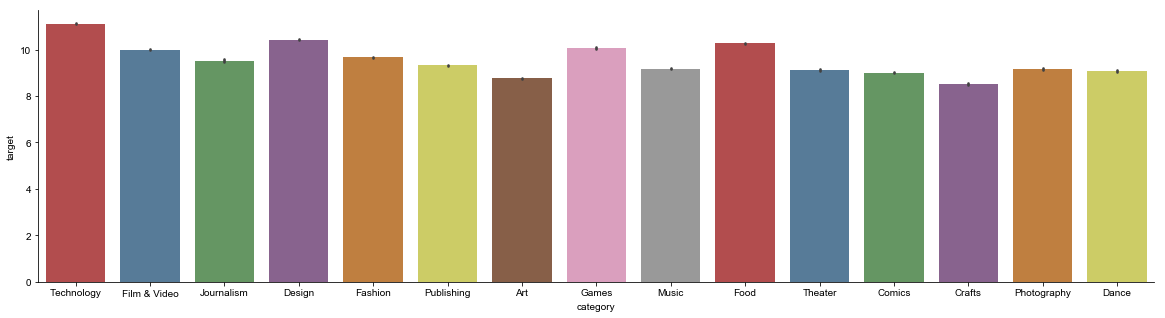

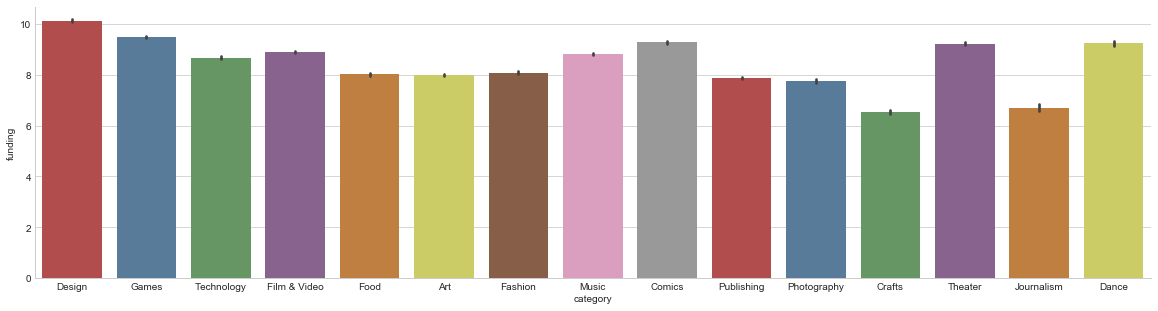

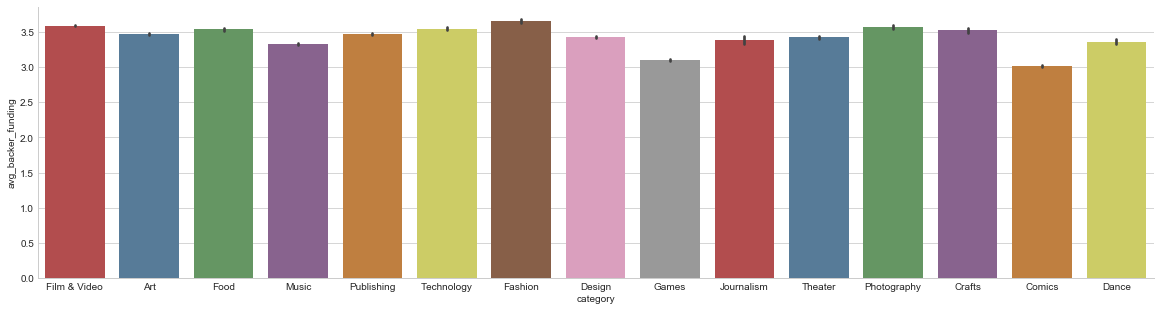

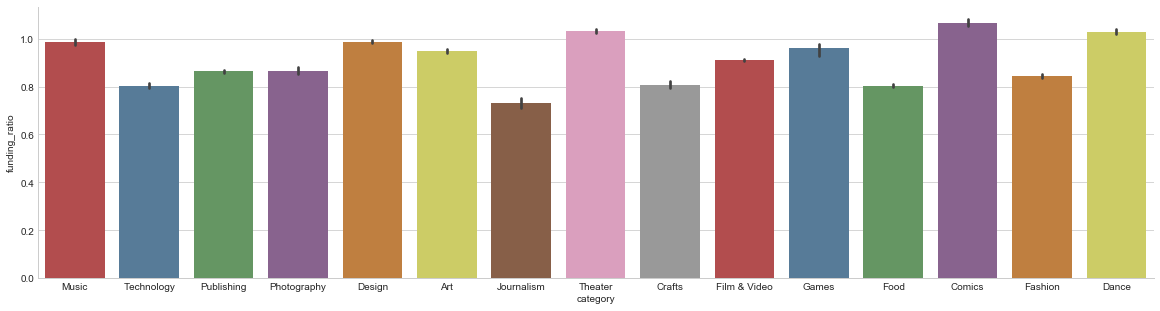

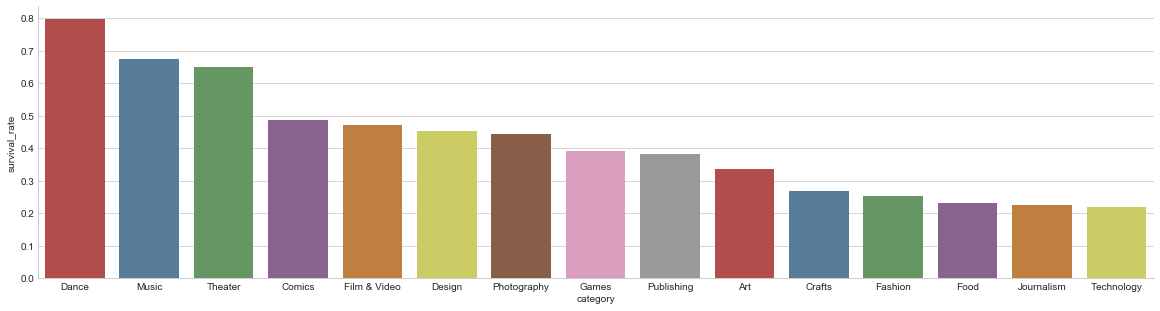

In [66]:
kC = kC.sort_values('target',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(x = kC['category'], y= kC['target'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)
# No major Variation by Target

kC = kC.sort_values('funding',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(x = kC['category'], y= kC['funding'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)
# 

kC = kC.sort_values('avg_backer_funding',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(x = kC['category'], y= kC['avg_backer_funding'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)
# 

kC = kC.sort_values('funding_ratio',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(x = kC['category'], y= kC['funding_ratio'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)
# Some Variation by funding_ratio

kC = kC.sort_values('survival_rate',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(x = kC['category'], y= kC['survival_rate'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)
# Significant difference by survival_rate



#### ii) Indiegogo 

[Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,'Community Projects'),
 Text(0,0,

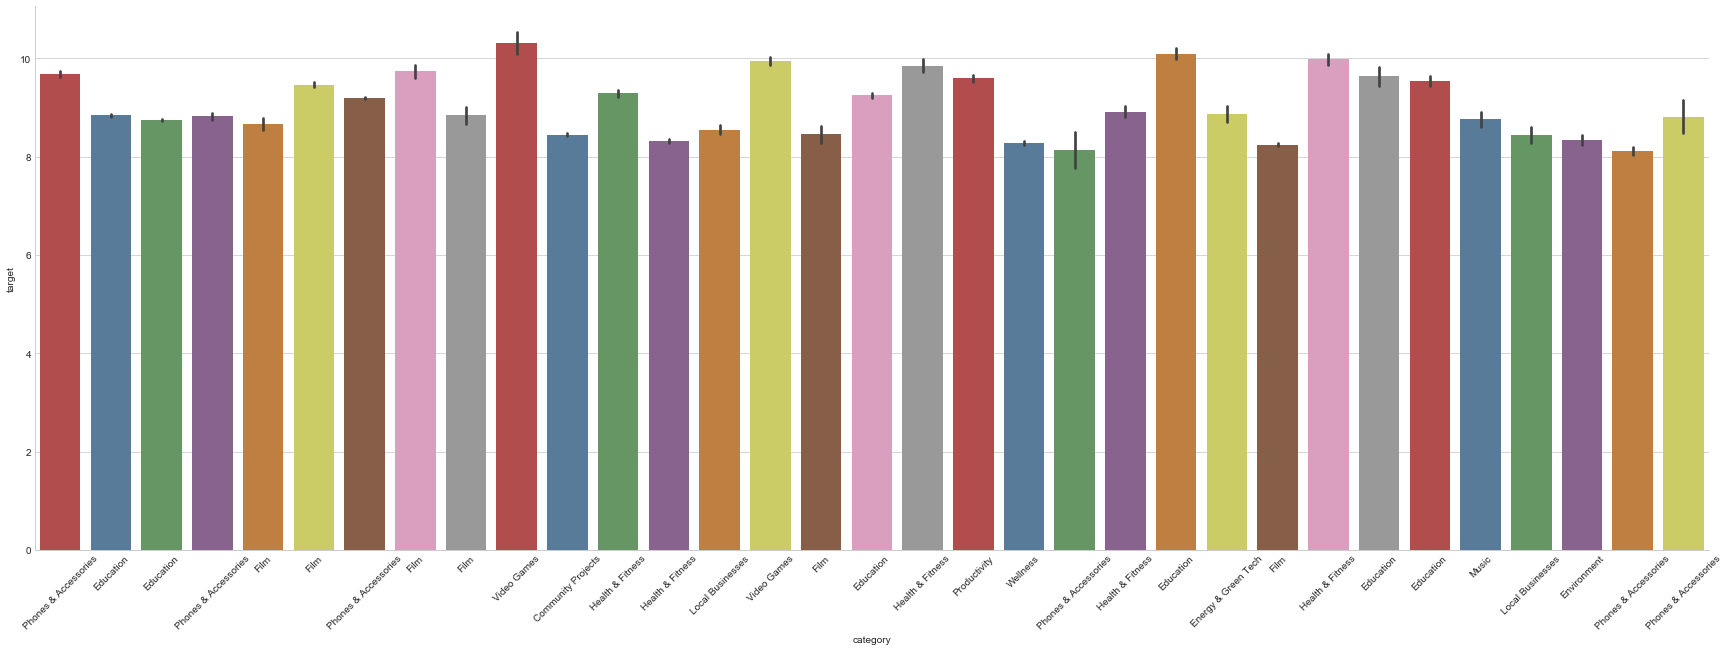

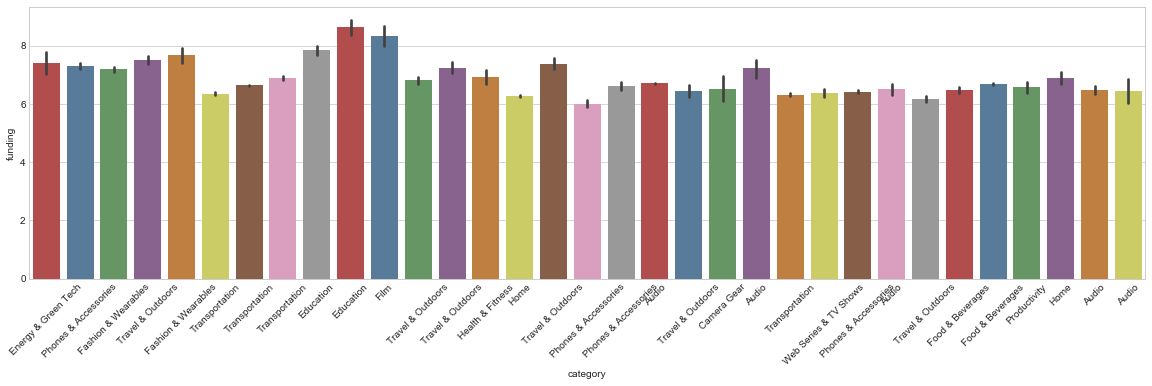

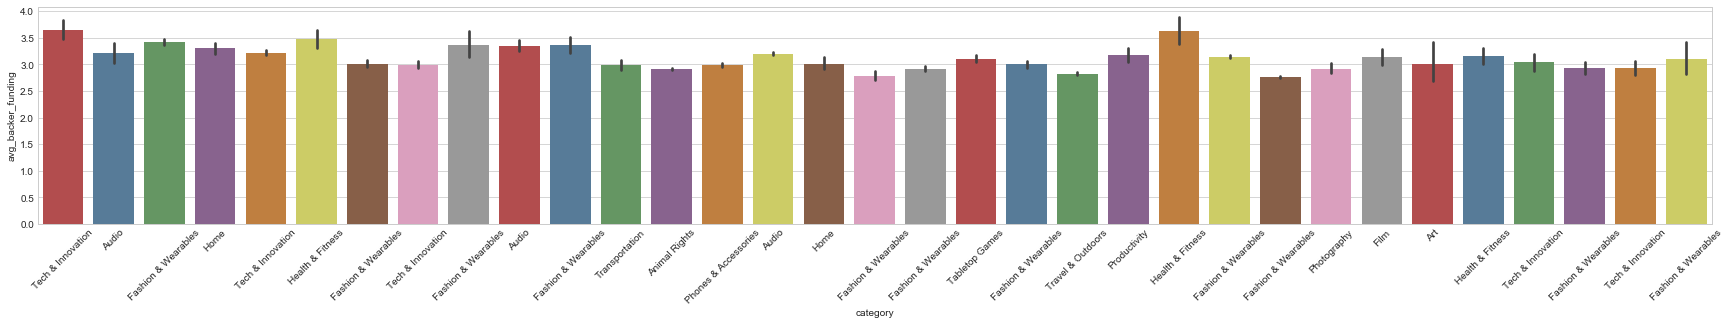

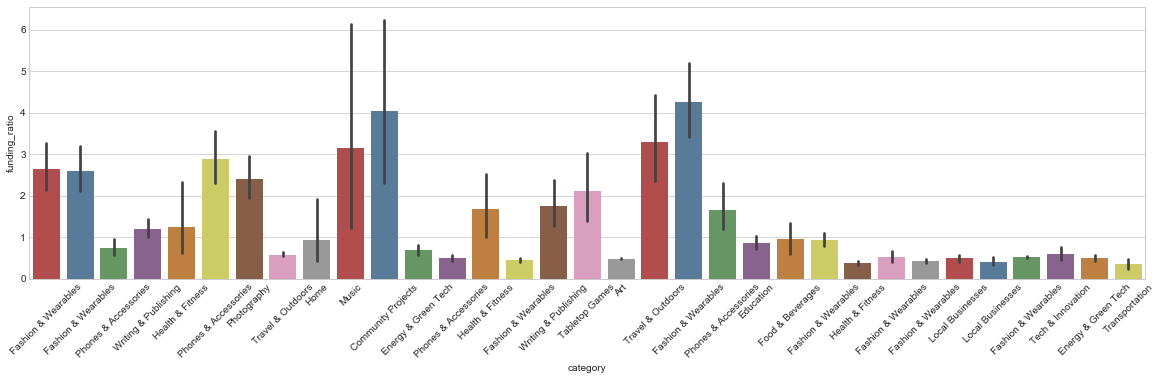

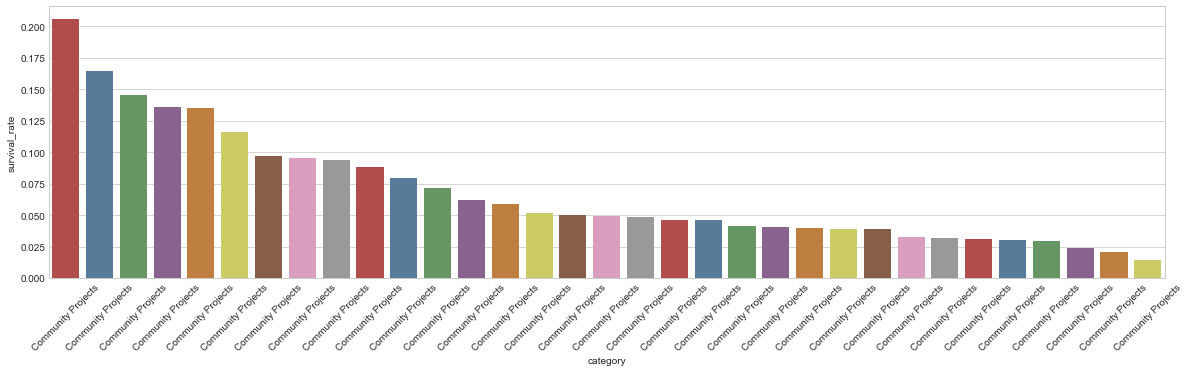

In [67]:
iC = iC.sort_values('target',  ascending = False)
plt.subplots(figsize = (30,10))
sns.set_style("whitegrid")
target = sns.barplot(x = iC['category'], y= iC['target'] ,data = iC,
            palette="Set1",saturation = 0.5)

target.set_xticklabels(rotation=45,labels = iC.category)
# No major Variation by Target
sns.despine(right = True, top = True)

iC = iC.sort_values('funding',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
funding = sns.barplot(x = iC['category'], y= iC['funding'] ,data = iC,
            palette="Set1",saturation = 0.5)

funding.set_xticklabels(rotation=45,labels = iC.category)
# 

iC = iC.sort_values('avg_backer_funding',  ascending = False)
plt.subplots(figsize = (30,4))
sns.set_style("whitegrid")
avg_backer_funding=sns.barplot(x = iC['category'], y= iC['avg_backer_funding'] ,data = iC,
            palette="Set1",saturation = 0.5)

avg_backer_funding.set_xticklabels(rotation=45,labels = iC.category)
# 

iC = iC.sort_values('funding_ratio',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
funding_ratio=sns.barplot(x = iC['category'], y= iC['funding_ratio'] ,data = iC,
            palette="Set1",saturation = 0.5)

funding_ratio.set_xticklabels(rotation=45,labels = iC.category)
#

iC = iC.sort_values('survival_rate',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
survival_rate=sns.barplot(x = iC['category'], y= iC['survival_rate'] ,data = iC,
            palette="Set1",saturation = 0.5)

survival_rate.set_xticklabels(rotation=45,labels = iC.category)
#


#### i) Encode Platform 

In [68]:
kC["plat"]= 0 #"kick"
iC["plat"]= 1 #"indie"

dfC = pd.concat([kC,iC])

### 6.2.4. Hierarchical clustering
#### i) Feature Selection

In [69]:
# MEMORY ERROR - DATASET TOO LARGE
# Features  used for clustering 
platform_data = dfC[['target', 
                     "backers",
                     "funding",
                     "funding_ratio",
                     "category",
                     #'avg_backer_funding', 
                     #'survival_rate',
                     #funding_gap', 
                     #funding_ratio'
                    ]]
platform_data.shape  


(394400, 5)

#### ii) Sample Creation

In [70]:
# need a random sample so that there is even representation across categories
# Sample used mapping clusters to categories
# Max value ? 
sample_df = platform_data.sample(5000,random_state = 234871).iloc[:, 0:5]
# Sample used for clustering 
sample_data = sample_df.iloc[:,0:4].values  
sample_data.shape  #CANNOT HANDLE MORE VALUES!

(5000, 4)

In [71]:
sample_df.category.value_counts(); #random representation by sample 
                                  # not ideal representation pf categories

#### iii) Plotting Dendrogram

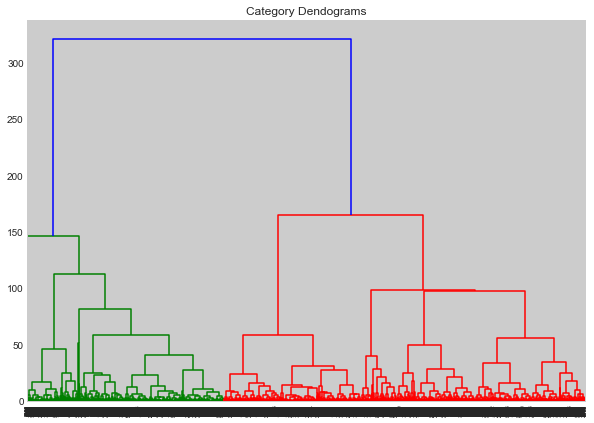

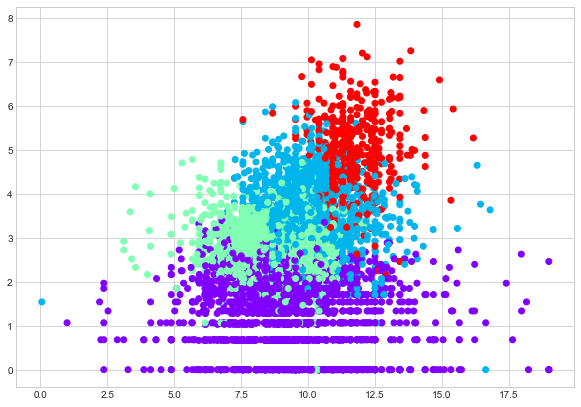

In [72]:
plt.figure(figsize=(10, 7))  
plt.title("Category Dendograms")  
dend = shc.dendrogram(shc.linkage(sample_data, method='ward'))

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
numbs = cluster.fit_predict(sample_data)  

plt.figure(figsize=(10, 7))  
plt.scatter(sample_data[:,0], sample_data[:,1], c=cluster.labels_, cmap='rainbow')  

#### iv) Creating New Taxonomy

In [73]:
# Matching Groups to Categories

cluster_groups =pd.DataFrame(numbs)
sample_df2 = sample_df["category"]
sample_df2 =pd.DataFrame(sample_df2)
sample_df2["clusters"] = cluster_groups.values

# Projects per Cluster
sample_df2.clusters.value_counts() 

# Catefories
sample_df2.category.unique()

# categories by most frequent cluster membership
frequency_count = dict(sample_df2.groupby(["category"])["clusters"].value_counts())

# Frequency count and cluster assignment done manualy
# for subjective decision on classification 

# Effectively 3 cluster_groups
taxonomy = {
            'Animal Rights':0,
            "Art":0,
            "Audio":1,
            "Camera Gear":2,
            "Comics":2,
            "Community Projects":0,
            "Crafts":0, 
            "Fashion":0,
            "Film":0,
            "Writing & Publishing":0,
            "Publishing":0,
            "Technology":0,
            "Film & Video":0,
            "Food":0,
            "Design":1,
            "Games":1,
            "Music":1,
            "Video Games":0,
            "Local Businesses":0,
            "Health & Fitness":0,
            "Dance & Theater":2,
            "Tech & Innovation":1,
            "Fashion & Wearables":0,
            "Theater":1,
            "Education":0,
            "Productivity":0,
            "Photography":0,
            "Home":2,
            "Journalism":1,
            "Dance":1,
            "Phones & Accessories":0,
            "Environment":0,
            "Travel & Outdoors":0,
            "Wellness":0,
            "Food & Beverages":2,
            "Web Series & TV Shows":2,
            "Energy & Green Tech":0,
            "Creative Works":0,
            "Spirituality":2,
            "Transportation":1,
            "Culture":1,
            "Human Rights":0,
            "Tabletop Games":2,
            "Podcasts, Blogs & Vlogs":2,       
            }

#### v) Replacing Dataset Categories with New Taxonomy  

In [74]:
dfC["category"].replace(taxonomy,inplace=True);
# Name Clusters for easier comparison when dummified

cluster_names = {0:"group1",1:"group2",2:"group3",3:"group4"}
dfC["category"].replace(cluster_names,inplace=True);

dfC.rename(index=str,columns={"category":"cluster_group"},inplace=True)
dfC.head()

,cluster_group,target,avg_backer_funding,survival_rate,funding_gap,funding_ratio,backers,funding,outcome,plat
11646,group2,10.645473,2.869194,0.795984,2.358230,1.221524,4.532180,13.003703,successful,0
320094,group2,8.681109,2.807040,0.795984,1.926098,1.221872,3.778787,10.607207,successful,0
58961,group2,9.539212,3.581430,0.795984,-5.957782,0.375443,0.000000,3.581430,failed,0
238598,group2,8.408151,3.416342,0.795984,1.697219,1.201854,2.957951,10.105370,successful,0
213622,group2,8.707246,3.210685,0.795984,1.535163,1.176309,3.190101,10.242410,successful,0


### 6.2.4 Dummify 
#### i) Outcome

In [75]:
dfC = dummify(dfC,"outcome");

#### ii) Platform

In [76]:
#name platform
platform_names = {0:"kick",1:"indie"}
dfC["plat"].replace(platform_names,inplace=True);

dfC = dummify(dfC,"plat");

#### iii) Cluster Group

In [77]:
dfC = dummify(dfC,"cluster_group");

#### iv) Platform / Outcome Feature
A four value feature that is encoded with the platform the project was crowdfunded on and its outcome.
In essense a merger of 5 columns 

In [90]:
dfC["class"] = dfC[["failed","successful","indie","kick"]].astype(str).apply(lambda x: '-'.join(x), axis=1)

dfC.head()

,target,avg_backer_funding,survival_rate,funding_gap,funding_ratio,backers,funding,failed,successful,indie,kick,group1,group2,group3,class
0,10.645473,2.869194,0.795984,2.358230,1.221524,4.532180,13.003703,0,1,0,1,0,1,0,0-1-0-1
1,8.681109,2.807040,0.795984,1.926098,1.221872,3.778787,10.607207,0,1,0,1,0,1,0,0-1-0-1
2,9.539212,3.581430,0.795984,-5.957782,0.375443,0.000000,3.581430,1,0,0,1,0,1,0,1-0-0-1
3,8.408151,3.416342,0.795984,1.697219,1.201854,2.957951,10.105370,0,1,0,1,0,1,0,0-1-0-1
4,8.707246,3.210685,0.795984,1.535163,1.176309,3.190101,10.242410,0,1,0,1,0,1,0,0-1-0-1
5,10.412997,4.689211,0.795984,-5.409263,0.480528,1.067074,5.003734,1,0,0,1,0,1,0,1-0-0-1
6,8.279822,3.123306,0.795984,-0.792056,0.904339,2.397385,7.487767,1,0,0,1,0,1,0,1-0-0-1
7,7.227057,3.309732,0.795984,1.792199,1.247985,2.725071,9.019256,0,1,0,1,0,1,0,0-1-0-1
8,8.681109,2.963763,0.795984,1.530293,1.176279,3.445418,10.211402,0,1,0,1,0,1,0,0-1-0-1
9,9.181180,3.139557,0.795984,1.853682,1.201900,3.514783,11.034862,0,1,0,1,0,1,0,0-1-0-1


#### v) Save Dataset

In [79]:
# classification_data case-sensitive, will affect taxonomy
dfC.to_csv("classification_data.csv",index=False) 

## 6.3. Summary (vi)
##### Regressions
Not all features were to be used in the Regressions. 
Categorical features were dummified.
-	Category
-	Outcome
 
##### Classification

Merged datasets and encoded by platform. 

- Visual Inspection.

    - Determining how to bin the numerous different project categories across  platforms proved challenging. 
    - The lack of distinguishing patterns upon a Visual Inspection of bar charts  indicated that a purely subjective assessment method was flawed. 


- Clustering. 

Approach:
   -  Hierarchical Clustering was used and with an agglomerative approach, that resulted in the algorithm determining the number of clusters from the bottom-up.
   - The entire process was visualised through a dendogram. 
   - Cluster groupings were assigned to a dictionary of categories through a manual and subjective comparison of value_counts().   
   - Finally, category names were replaced with a respective cluster_group value.
       
Issues:

   - Only a sample of the data could be clustered due to memory allocation issues, since this method is very computationally intensive. 

Dummy variables:

-	outcome
-	platform
-	cluster_group
-	platform/outcome 
        - The "class" was created by merging the encoded values of platform and outcome. 0 represents a lack of a value and 1 the presence a value:  eg. 0101 represents a successful project on Kickstarter. This effectively allows the classification algorithm to make a prediction on the platform and outcome of a project.  

# 7. Modeling

In [80]:
##CONTINGENCY FILES
kR = pd.read_csv("kR.csv")
iR = pd.read_csv("iR.csv")

## 7.1 Decision Tree Regression
Decision tree regression determine potential splits by measuring how much they reduce the mean squared error (MSE).

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
where $y_i$ is the true value of the target and $\hat{y}_i$ is the predicted value.

This approach benedits from being non-parametric and non-linear (ideal for a the abnoral distribution of these datasets). [6]

### 7.1.1. Kickstarter Regression
#### i) Vanilla Model

In [81]:
#Model with just the original input features: "target","funding","backers"
def Decision_Tree_Regression_Vanilla (df_name):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        print (header("MAPE"), mape)
    
    
    X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(df_name.loc[:,["backers","target","funding"]], df_name["funding_gap"], test_size=0.20, random_state=42)
     
    
    
    regr = DTR()
    regr.fit(X_train_k,y_train_k)
    y_pred_k = regr.predict(X_test_k)
    mae  = mean_absolute_error(y_test_k,y_pred_k) #calling function
    print (header("Mean Absolute Error"),mae)
    median_ae = median_absolute_error(y_test_k,y_pred_k)#calling function
    print (header("Median Absolute Error"),median_ae)
    #MAPE
    mean_absolute_percentage_error(y_test_k,y_pred_k)
    
    #MEAN SQUARED ERROR
    mse = mean_squared_error(y_test_k,y_pred_k)
    print(header("Mean Squared Error"),mse) 
                                 
    feature_importance = regr.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    print (feature_importance)
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train_k.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
        #Relative Error
    RE= abs(y_pred_k-y_test_k)/y_test_k
    print (header("Relative Error"),RE)
    
    #Relative Error Histogram
    sns.distplot(RE)
    plt.show()
    



 'Mean Absolute Error' : 
 0.01966549408905053

 'Median Absolute Error' : 
 0.0019235614456718508

 'MAPE' : 
 4.067102446525618

 'Mean Squared Error' : 
 0.00595249949668351
[100.          29.94761273  26.99355008]


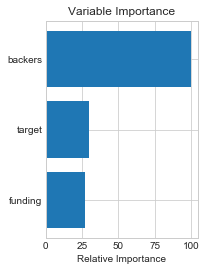


 'Relative Error' : 
 166822    3.213632e-03
101628   -2.179566e-02
231722    8.340476e-06
254186   -6.111467e-02
99375     5.949203e-03
57452     1.832045e-02
161467    2.347588e-03
312524    1.027127e-01
271810    1.274873e-04
315865   -0.000000e+00
279500    4.766739e-03
79192     2.411952e-02
117073    4.497603e-05
319223   -6.533493e-05
308597    2.665681e-03
250208   -0.000000e+00
38770     2.858656e-05
286756   -3.271718e-03
295469   -8.321959e-02
257796   -3.350875e-03
255698   -9.743337e-02
74582     6.529597e-05
194184   -1.810521e-15
58400    -1.401504e-06
146330   -1.938467e-02
70315    -3.069613e-03
284361    1.939427e-02
289417    3.570361e-05
35321    -0.000000e+00
129072    7.094970e-03
              ...     
264314    3.559732e-04
304065   -1.689877e-06
49883     1.524001e-03
157324   -0.000000e+00
223996    1.579088e-04
70527     2.634007e-02
223041   -6.286759e-03
98640    -3.502874e-03
5464      0.000000e+00
33045     6.319869e-02
274049    1.444228e-04
22257     3

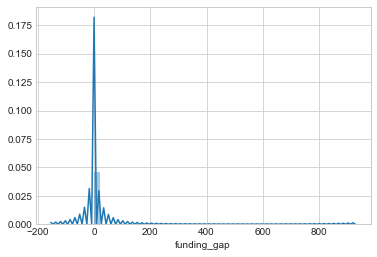

In [82]:
Decision_Tree_Regression_Vanilla(kR)

#### ii) Enhanced Model

In [83]:
#Model with all features.
def Decision_Tree_Regression_Enhanced (df_name):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        print (header("MAPE"), mape)
        
    X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(df_name.drop([
                                                                     "funding_gap",
                                                                     #"funding_ratio",
                                                                     #"backers",
                                                                     #"funding",
                                                                    ],1), df_name["funding_gap"], test_size=0.20, random_state=42)
    regr = DTR()
    regr.fit(X_train_k,y_train_k)
    y_pred_k = regr.predict(X_test_k)
    mae  = mean_absolute_error(y_test_k,y_pred_k) #calling function
    print (header("Mean Absolute Error"),mae)
    median_ae = median_absolute_error(y_test_k,y_pred_k)#calling function
    print (header("Median Absolute Error"),median_ae)
    #MAPE
    mean_absolute_percentage_error(y_test_k,y_pred_k)
    
    #MEAN SQUARED ERROR
    mse = mean_squared_error(y_test_k,y_pred_k)
    print(header("Mean Squared Error"),mse) 
                                 
    feature_importance = regr.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    print (feature_importance)
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train_k.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
        #Relative Error
    RE= abs(y_pred_k-y_test_k)/y_test_k
    print (header("Relative Error"),RE)
    
    #Relative Error Histogram
    sns.distplot(RE)
    plt.show()


 'Mean Absolute Error' : 
 0.009433941406756843

 'Median Absolute Error' : 
 0.00112058343460264

 'MAPE' : 
 0.43717962736984195

 'Mean Squared Error' : 
 0.0014565426421141447
[4.15956821e+00 2.11845004e-03 1.39668968e-04 1.00000000e+02
 4.70605061e-04 1.32558671e+00 1.48887338e-05 3.57090193e-06
 4.03036731e-06 6.61327400e-07 5.06887106e-05 1.08691495e-05
 3.59951227e-05 1.88183532e-05 8.33245730e-05 3.72028882e-06
 1.04789776e-05 4.52486437e-06 1.57480711e-05 8.21838981e-05
 9.30696241e-06 4.85240556e-06 2.63214166e-06]


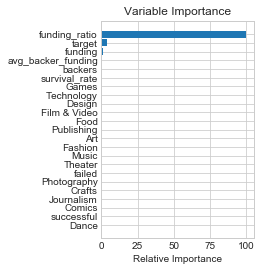


 'Relative Error' : 
 166822    3.213632e-03
101628   -3.163068e-03
231722    9.300417e-07
254186   -2.232764e-03
99375     9.122927e-03
57452     5.986194e-03
161467    0.000000e+00
312524    1.588160e-02
271810    1.274873e-04
315865   -0.000000e+00
279500    3.660674e-03
79192     8.690548e-03
117073    1.256301e-04
319223   -6.533493e-05
308597    2.759792e-03
250208   -0.000000e+00
38770     7.377956e-06
286756   -3.271718e-03
295469   -4.862298e-03
257796   -7.755871e-03
255698   -2.937587e-02
74582     1.052194e-04
194184   -1.810521e-15
58400    -1.173378e-07
146330   -9.875391e-03
70315    -3.073195e-03
284361    4.190142e-03
289417    1.803711e-04
35321    -0.000000e+00
129072    2.165853e-03
              ...     
264314    3.351647e-04
304065   -1.689877e-06
49883     2.855404e-04
157324   -0.000000e+00
223996    1.026994e-04
70527     3.144700e-03
223041   -1.195629e-03
98640    -3.502874e-03
5464      0.000000e+00
33045     1.541489e-02
274049    1.131226e-04
22257     3

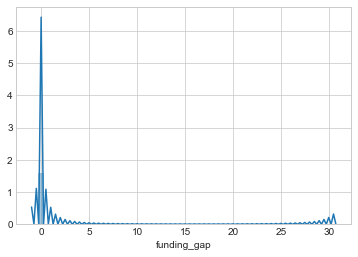

In [84]:
Decision_Tree_Regression_Enhanced(kR)

### 7.1.2. Indiegogo Regression
#### i) Vanilla Model


 'Mean Absolute Error' : 
 0.011463207990108673

 'Median Absolute Error' : 
 0.00033187507592924437

 'MAPE' : 
 5.867867193308414

 'Mean Squared Error' : 
 0.0016858451666839772
[5.94969502e-03 4.96493592e+01 1.00000000e+02]


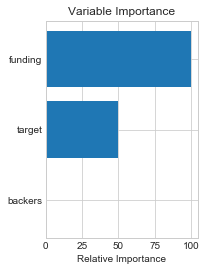


 'Relative Error' : 
 50305   -7.258246e-05
73799   -1.112190e-04
67558   -4.983945e-02
28073   -4.601724e-05
28042   -4.281351e-05
70428   -1.428986e-03
64114   -7.519535e-05
41086   -1.489472e-04
4745    -3.050698e-03
24625   -4.850003e-06
35838   -0.000000e+00
31787   -3.000038e-05
37188   -7.149457e-05
34199   -3.674241e-03
28376   -1.359314e-05
643     -5.161353e-06
29349   -1.625224e-04
69752   -4.491520e-04
47087   -1.609477e-02
15022   -1.932329e-06
54025   -4.531478e-05
7730    -1.241733e-01
46800   -1.692457e-04
1090    -4.992944e-05
53581   -2.891812e-04
27063   -0.000000e+00
12687   -1.242233e-05
29384   -0.000000e+00
253     -8.436212e-05
67511   -1.836382e-01
             ...     
33392   -2.973694e-02
7542    -3.754699e-04
57900   -1.045041e-03
41816   -3.533459e-04
9517    -1.803094e-04
29903   -7.519733e-07
28891   -0.000000e+00
5552    -1.879655e-05
13124   -0.000000e+00
59098   -5.382806e-01
28052   -3.905342e-05
44524   -8.832887e-04
23604   -5.562148e-05
21850   -

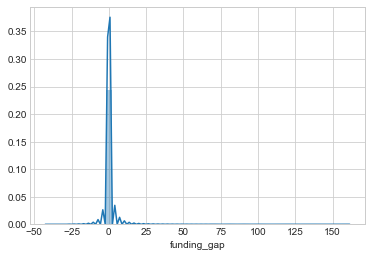

In [85]:
Decision_Tree_Regression_Vanilla(iR)

#### ii) Enhanced Model


 'Mean Absolute Error' : 
 0.0038442342203369984

 'Median Absolute Error' : 
 0.0003558869474782622

 'MAPE' : 
 1.996516217433271

 'Mean Squared Error' : 
 0.00019864032311667055
[6.06789998e-01 2.34941084e-04 3.12338808e-04 1.00000000e+02
 6.41085752e-04 1.08494318e-02 1.87059619e-06 5.56765771e-05
 2.57948552e-06 5.94255634e-06 2.43764203e-06 5.44661293e-07
 1.34018739e-07 9.64917773e-08 2.58440811e-06 1.01712155e-05
 2.39163891e-07 3.35060237e-06 6.60751549e-06 2.84544023e-05
 1.73196462e-06 1.60153496e-05 4.51875211e-06 3.04191510e-07
 1.09784456e-05 6.46786862e-06 2.86516650e-05 6.73401725e-06
 5.52199076e-08 3.93761681e-06 1.92063513e-07 1.22823930e-06
 6.78466313e-06 2.92983234e-05 5.71168208e-06 2.19528678e-05
 3.73171471e-07 8.54293494e-07 8.56766776e-06 7.63781825e-06
 1.49245719e-05]


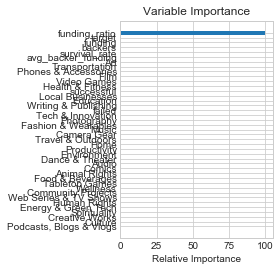


 'Relative Error' : 
 50305   -7.258246e-05
73799   -1.271074e-04
67558   -4.055213e-02
28073   -3.137656e-04
28042   -2.842192e-05
70428   -1.428986e-03
64114   -7.519535e-05
41086   -1.489472e-04
4745    -1.036472e-04
24625   -3.817027e-16
35838   -0.000000e+00
31787   -3.000038e-05
37188   -7.149457e-05
34199   -3.674241e-03
28376   -1.359314e-05
643     -5.357736e-06
29349   -1.625224e-04
69752   -4.837139e-03
47087   -3.717750e-04
15022   -1.932329e-06
54025   -1.540921e-04
7730    -1.357999e-04
46800   -1.692457e-04
1090    -1.447196e-04
53581   -2.891812e-04
27063   -0.000000e+00
12687   -1.242233e-05
29384   -3.188808e-03
253     -8.436212e-05
67511   -2.218331e-01
             ...     
33392   -2.487212e-04
7542    -3.754699e-04
57900   -3.732748e-03
41816   -3.533459e-04
9517    -1.803094e-04
29903   -1.415425e-05
28891   -0.000000e+00
5552    -1.879655e-05
13124   -0.000000e+00
59098   -4.438887e-02
28052   -6.471801e-05
44524   -2.283516e-03
23604   -4.123026e-05
21850   -

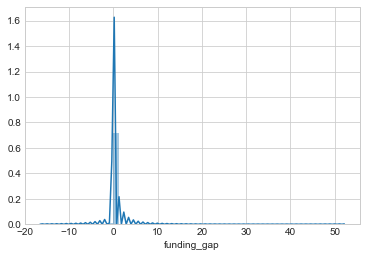

In [86]:
Decision_Tree_Regression_Enhanced(iR)

## 7.2. Logistic Regression Classification 

In [87]:
## Contingency Data
dfC = pd.read_csv("classification_data.csv")

### 7.2.1. Vanilla Classification

In [88]:
#Predictors: "backers","funding","target"
X = dfC.loc[:,["backers","funding","target"]].values
#Produc: "class"
Y = dfC.loc[:,["class"]].values

#Split Train/Test 80-20.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state=25)

LogReg = LogisticRegression(random_state=0,solver="lbfgs",multi_class="multinomial")
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test) 


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     0-1-0-1       0.97      1.00      0.99     26496
     0-1-1-0       0.69      0.51      0.58      3247
     1-0-0-1       0.82      0.92      0.87     37490
     1-0-1-0       0.61      0.38      0.46     11647

   micro avg       0.85      0.85      0.85     78880
   macro avg       0.77      0.70      0.73     78880
weighted avg       0.84      0.85      0.84     78880



### 7.2.2. Enhanced Classification

In [91]:
#Predictors: all features except the dummies for outcome / platform. 
X = dfC.iloc[:,:-8].values 
#Produc: "class"
Y = dfC.loc[:,["class"]].values

#Split Train/Test 80-20.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state=25)

LogReg = LogisticRegression(random_state=0,solver="lbfgs",multi_class="multinomial")
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test) 


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

     0-1-0-1       0.98      1.00      0.99     26496
     0-1-1-0       0.97      0.99      0.98      3247
     1-0-0-1       1.00      0.99      0.99     37490
     1-0-1-0       0.99      0.99      0.99     11647

   micro avg       0.99      0.99      0.99     78880
   macro avg       0.99      0.99      0.99     78880
weighted avg       0.99      0.99      0.99     78880



## 7.3. Summary (vii)
##### Decision Tree Regression

- Decision tree regression determine potential splits by measuring how much they reduce the mean squared error (MSE)
- Some of their benefits include them being non-parametric and non-linear (ideal for this dataset). [6]
- Evaluation metrics included the Mean and Median Absolute Error, MAPE and MSE.
- Variable importance was also generated.
- Two models were built for each platform.  
##### Logistic Regression Classification
- The scikit-learn library was utilised for the multinomial regression on the “class” variable Y, using all other input variables X. 
- The solver was set to ‘lbfgs’, which only support L2 regularization with primal formulation. [7]
- Results assessed through a confusion matrix.
- Two models were built.


# ================================================== #